In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from common import *
from preprocess import base

% matplotlib inline

In [2]:
root_dir = os.getcwd()

In [3]:
def zw_original(path):
    data = pd.read_csv(path)
    name_list = get_name_zw()
    sub_data = data[name_list]
    return sub_data

def hw_original(path):
    data = pd.read_csv(path)
    name_list = get_name_hw()
    sub_data = data[name_list]
    return sub_data

def sdmc_original(path):
    data = pd.read_csv(path)
    name_list = get_name_sdmc()
    sub_data = data[name_list]
    return sub_data

def zw_sub_hw(path):
    data = pd.read_csv(path)
    temp_diff = pd.DataFrame()
    for i in np.arange(1, 7):
        name_hw = "ZX_HW{0}_{1}".format(2, i)
        for j in np.arange(1, 7):
            name_zw = "ZX_WD_{0}_{1}".format(i, j)
            temp_diff[name_zw] = data[name_zw] - data[name_hw]
    return temp_diff

def get_temp_mean(path):
    zws = zw_original(path)
    hws = hw_original(path)
    zw_mean = zws.mean(axis=1)
    hw_mean = hws.mean(axis=1)
    d = {'zw_mean': zw_mean,
         'hw_mean': hw_mean}
    df = pd.DataFrame(d)
    return df

def get_piece_corr_segment(data, win):
    start = 0
    end = start + win
    corr_value = []
    while end<len(data):
        sub = data.loc[start:end,:]
        corr_value.append(abs(sub.corr()).sum().sum()/data.shape[1])
        end += win
        start += win
    return corr_value

def get_piece_corr_rolling(data, win):
    start = 0
    end = start + win
    corr_value = []
    while end<len(data):
        sub = data.loc[start:end,:]
        corr_value.append(abs(sub.corr()).sum().sum()/data.shape[1])
        end += 1
        start += 1
    return corr_value

def get_dist_p(X, Y, p):
    return np.power(X-Y, p).sum()**(1/p)

def get_piece_dist_segment(X, Y, win, p):
    if(len(X) != len(Y)):
        print("not equal length series!!!!!!")
        return
    start = 0
    end = start + win
    results = []
    while end<len(X):
        results.append(get_dist_p(X[start:end], Y[start:end], p))
        start += win
        end += win
    return results

In [4]:
def get_sdmc_mean_speed(path):
    data = pd.read_csv(path)
    sdmc = sdmc_original(path)
    
    sdmc_mean = sdmc.mean(axis=1)
    d = {'sdmc_mean': sdmc_mean,
         'speed': data['ZD_SPEED']}
    df = pd.DataFrame(d)
    return df
def sdmc_mean_speed_main(data_dir):
    filelist = base.get_files_csv(data_dir)
    for file in filelist:
        path = data_dir + file
        df = get_sdmc_mean_speed(path)
        ax = df.plot(figsize=(12,2))
        ax.set_title(file)
        ax.legend(loc='best')

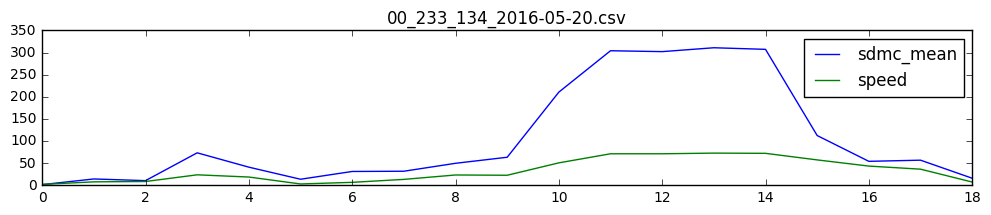

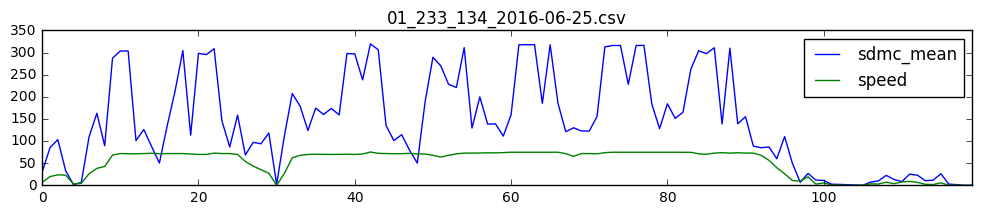

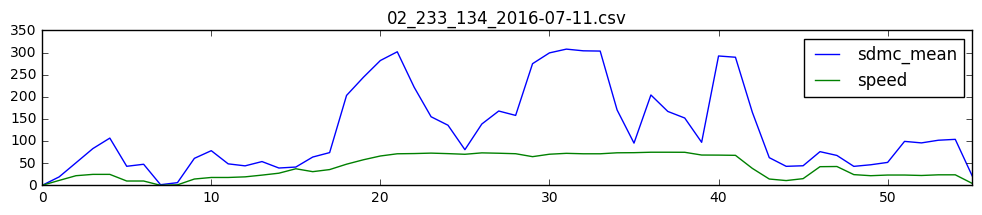

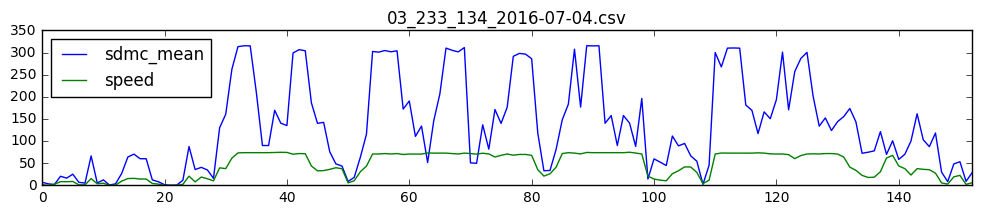

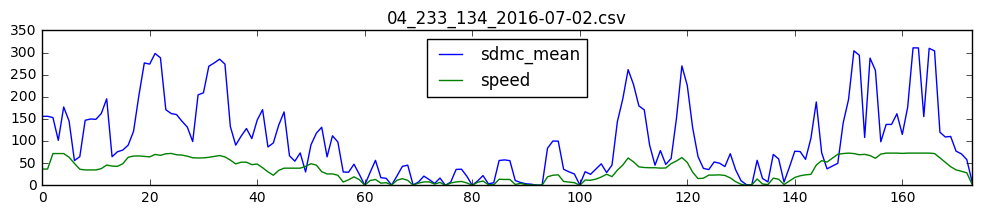

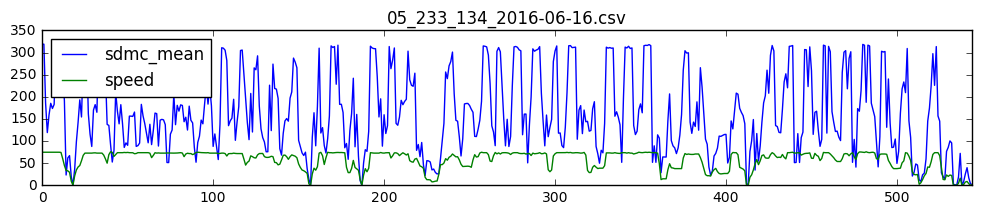

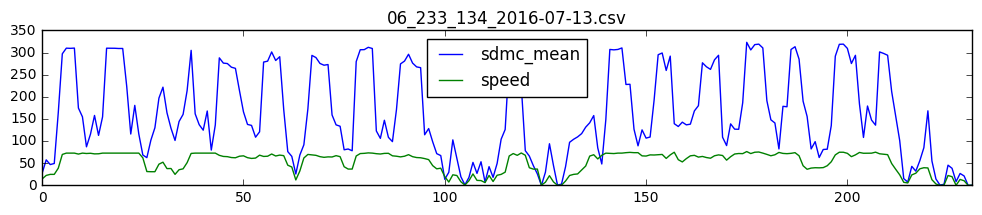

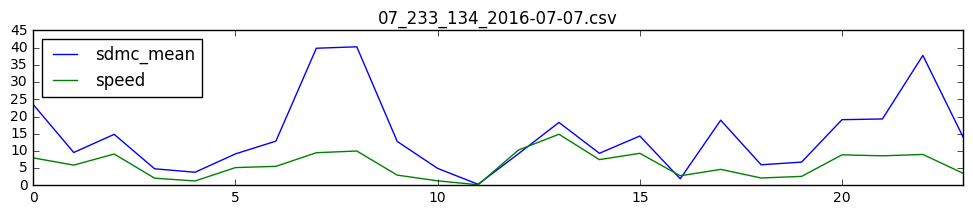

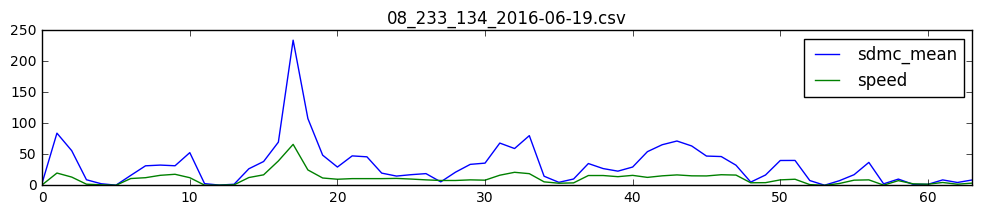

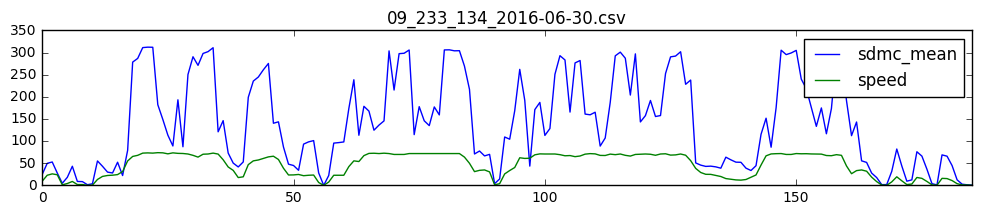

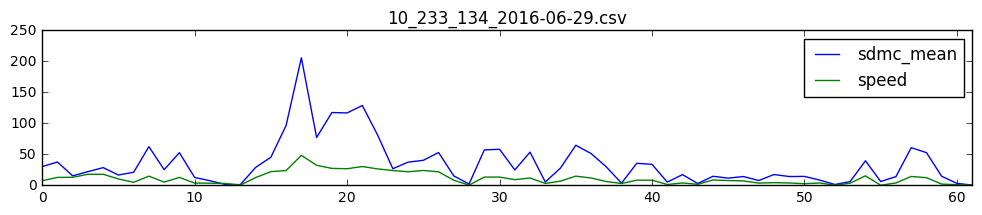

In [17]:
data_dir = root_dir + "/data_0134/speed_moving/"
sdmc_mean_speed_main(data_dir)

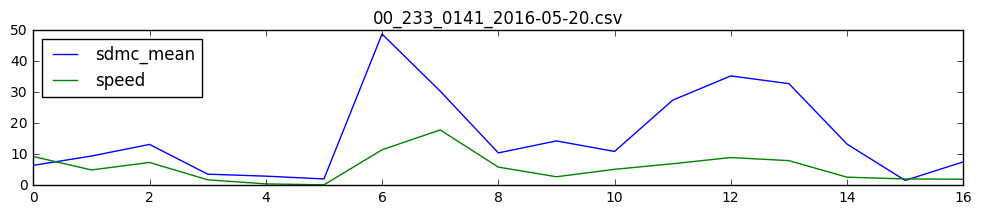

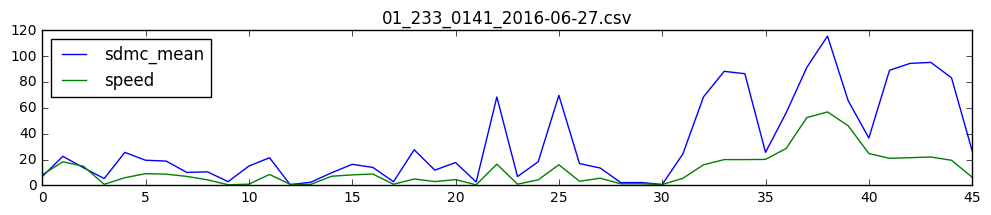

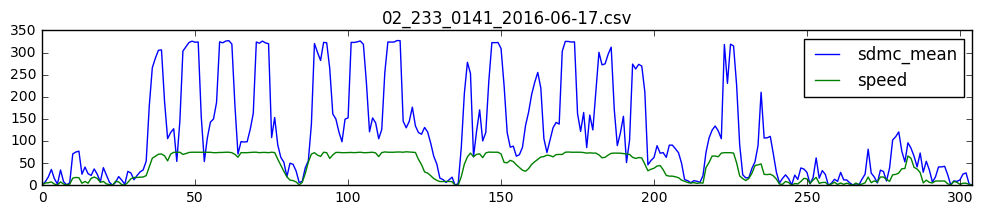

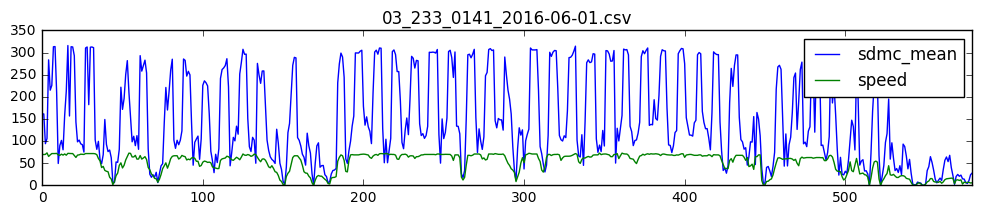

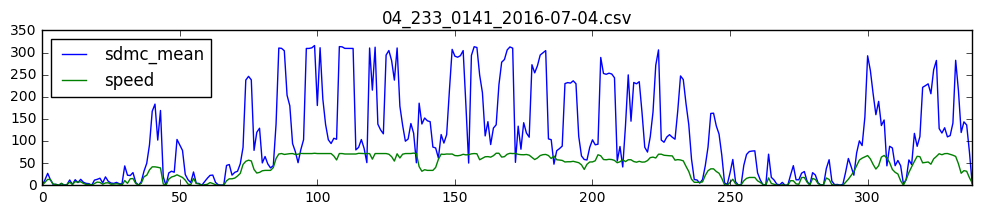

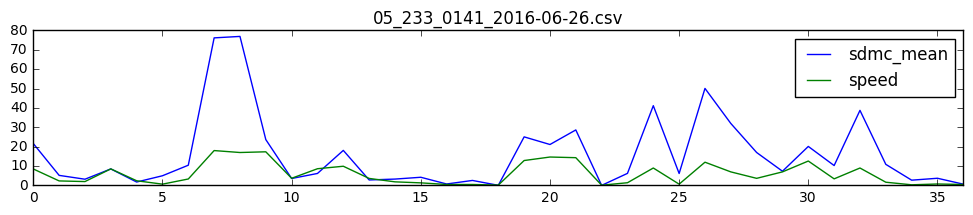

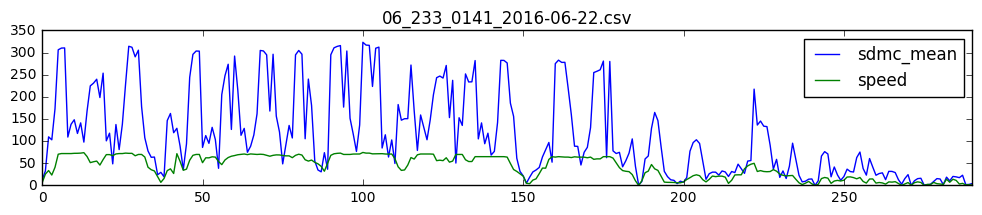

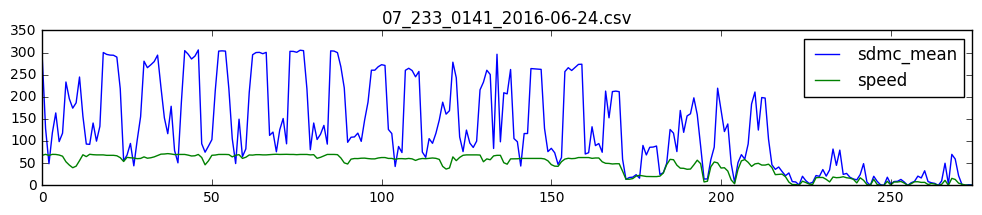

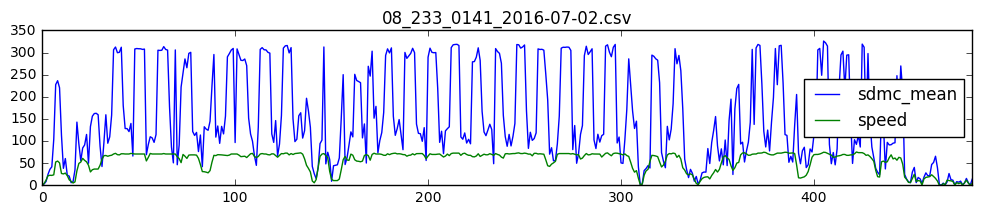

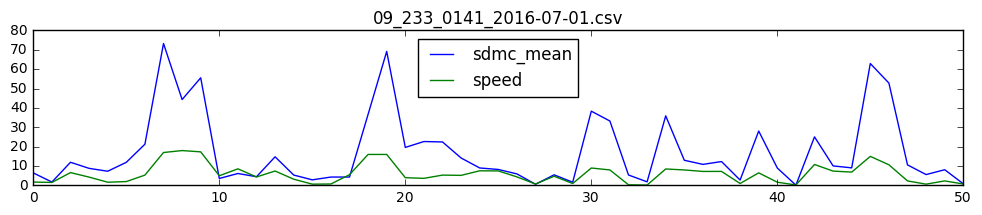

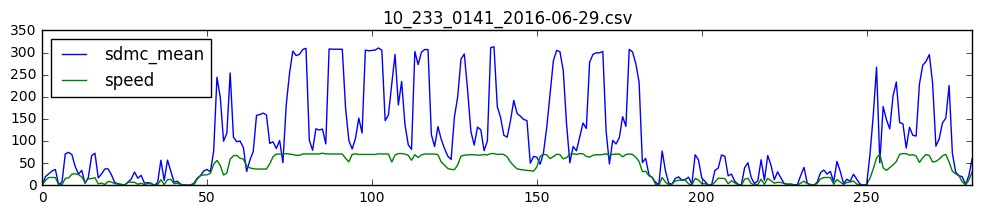

In [18]:
data_dir = root_dir + "/data_0141/speed_moving/"
sdmc_mean_speed_main(data_dir)

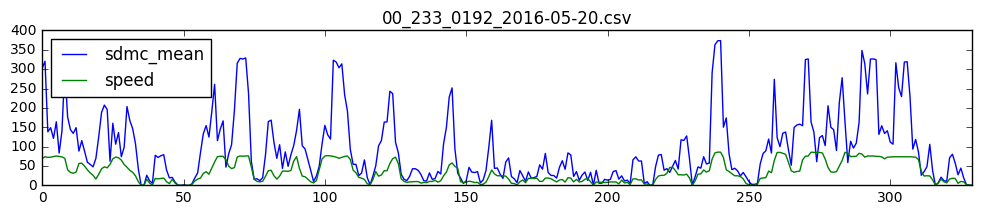

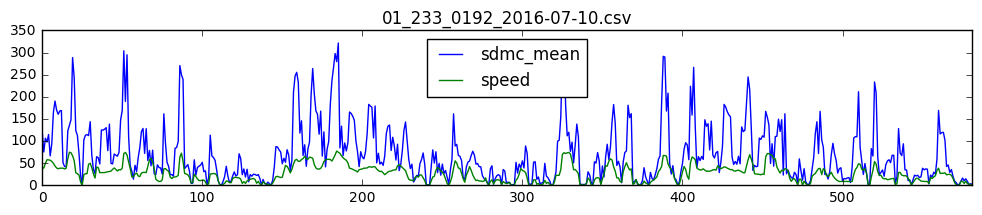

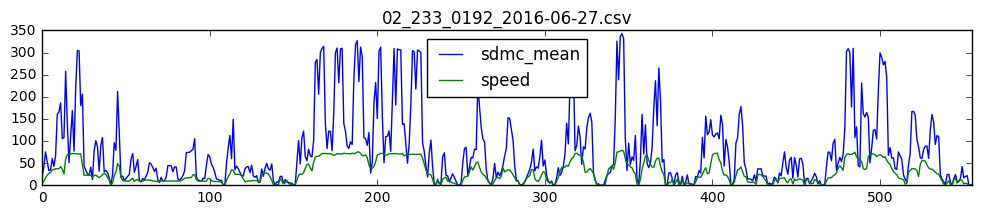

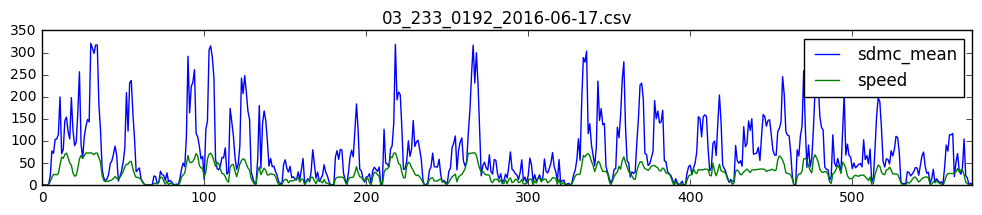

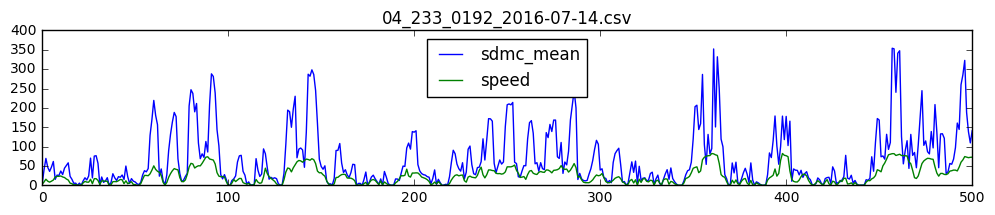

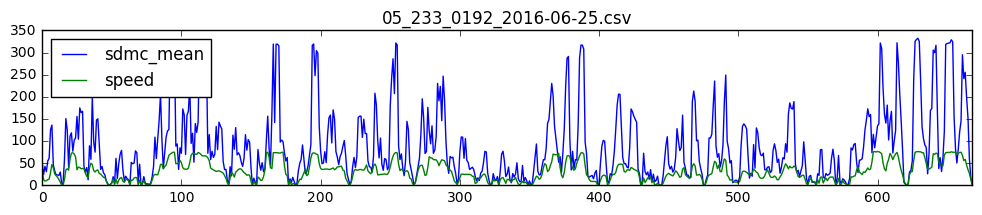

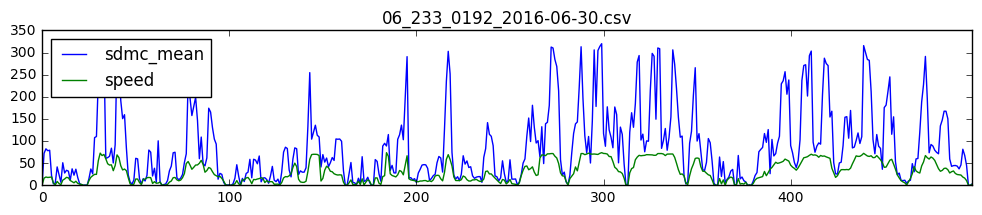

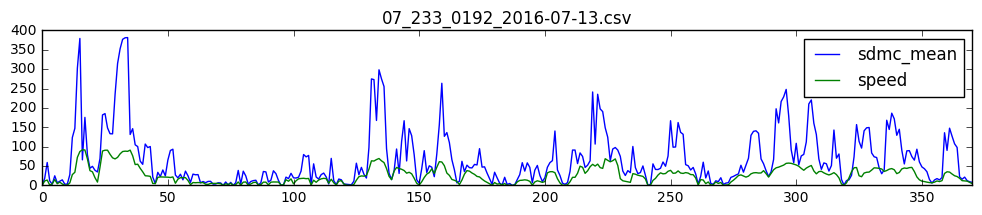

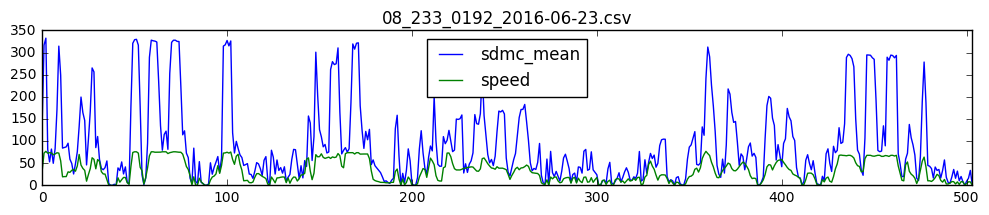

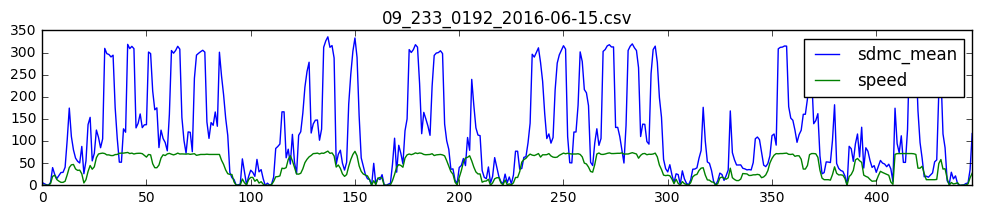

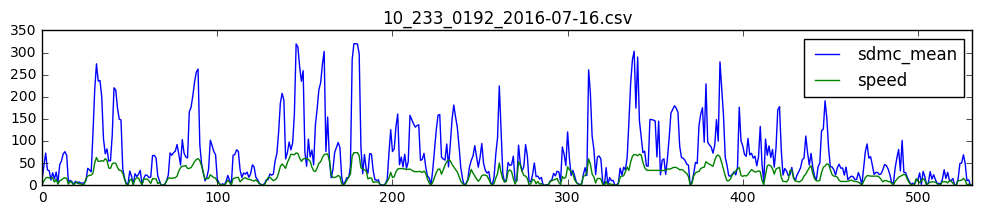

In [19]:
data_dir = root_dir + "/data_0192/speed_moving/"
sdmc_mean_speed_main(data_dir)

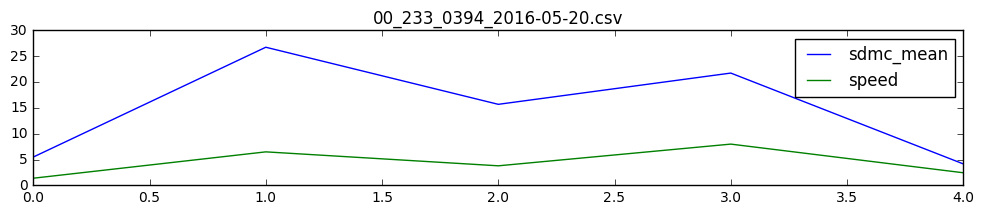

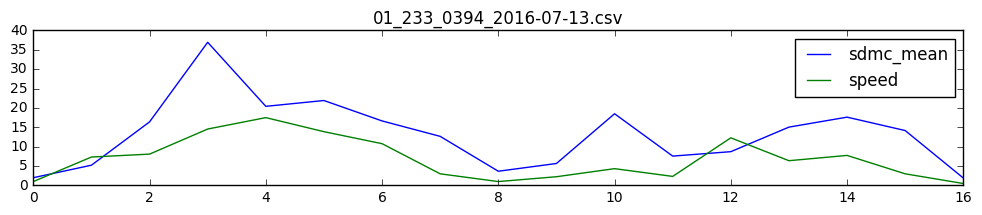

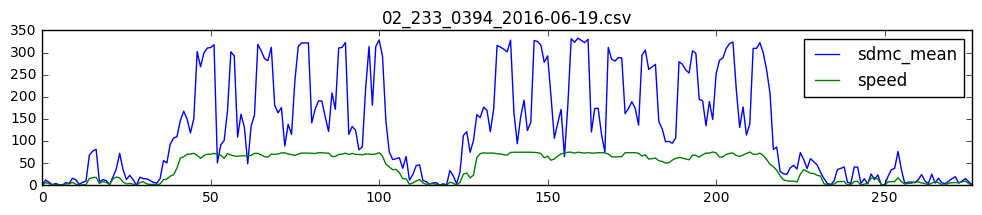

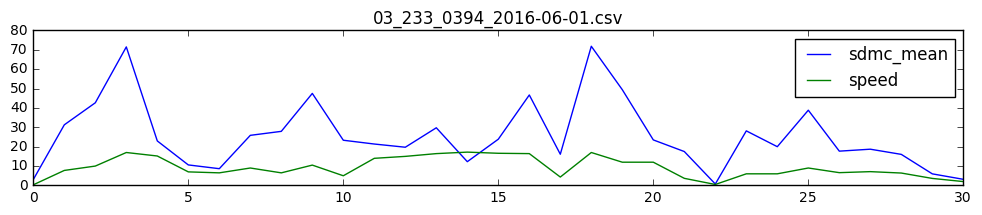

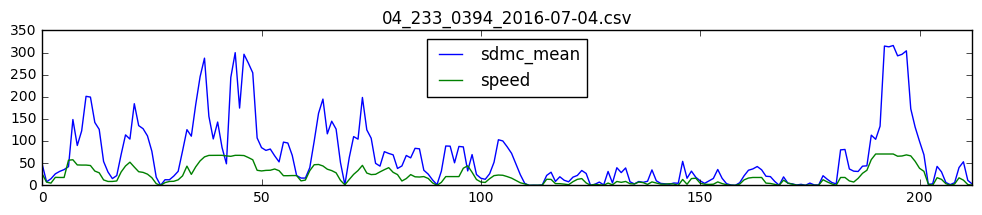

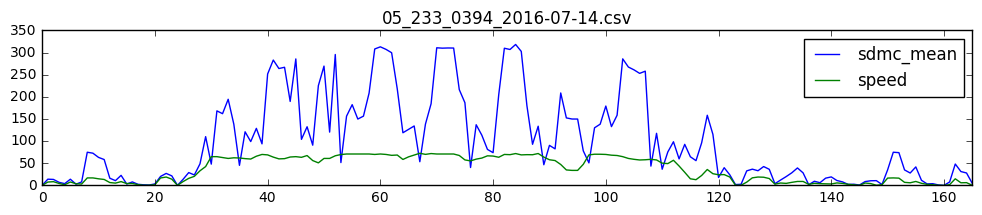

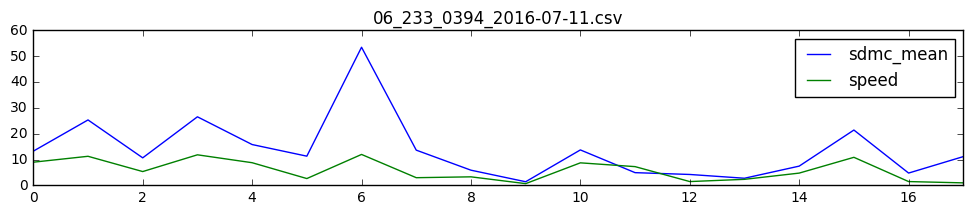

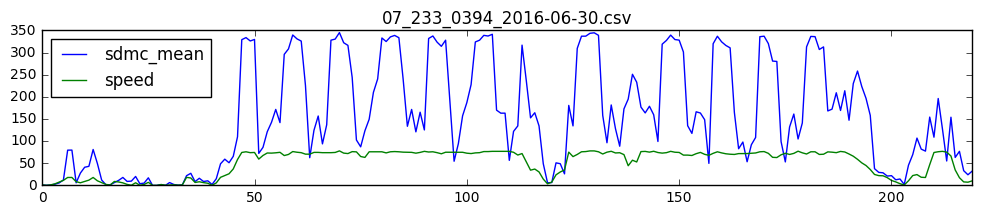

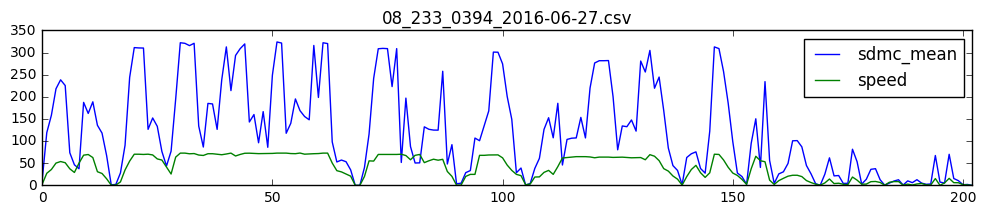

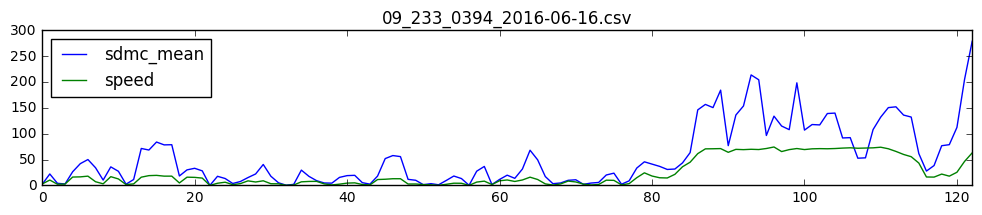

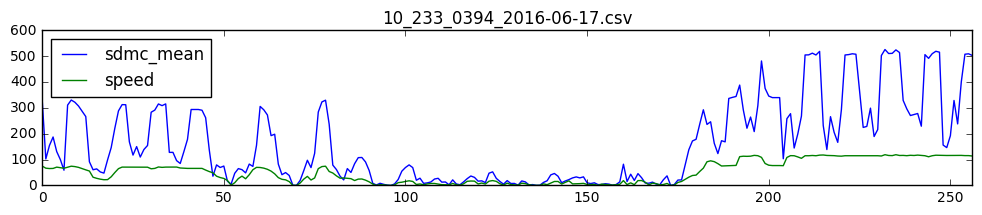

In [20]:
data_dir = root_dir + "/data_0394/speed_moving/"
sdmc_mean_speed_main(data_dir)

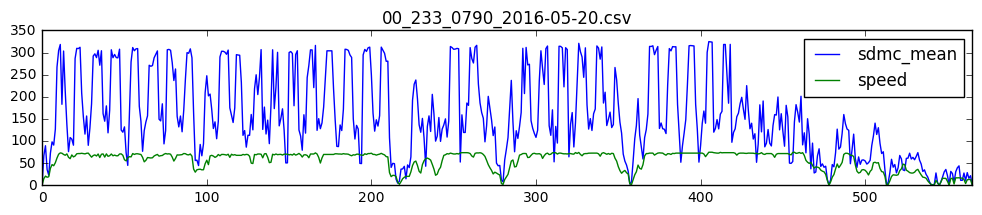

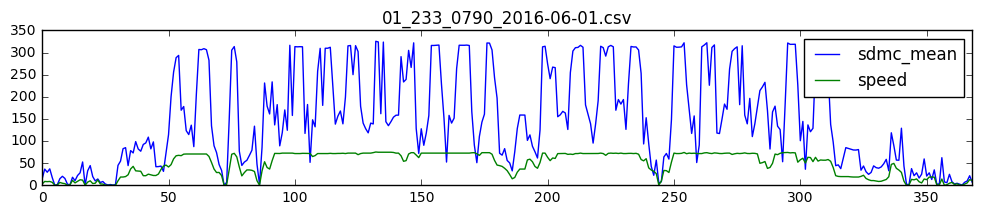

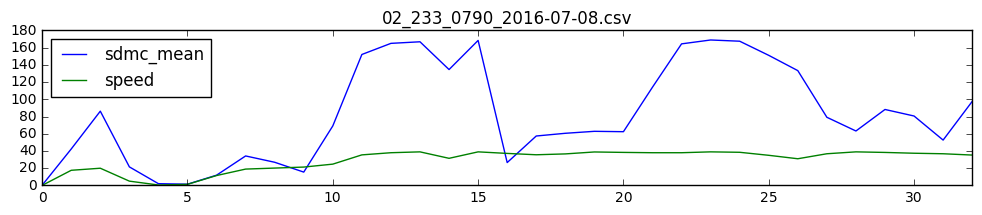

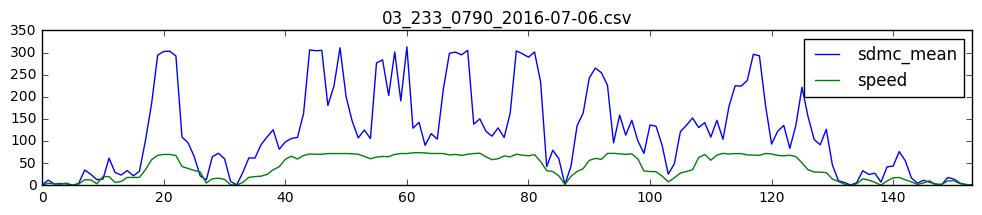

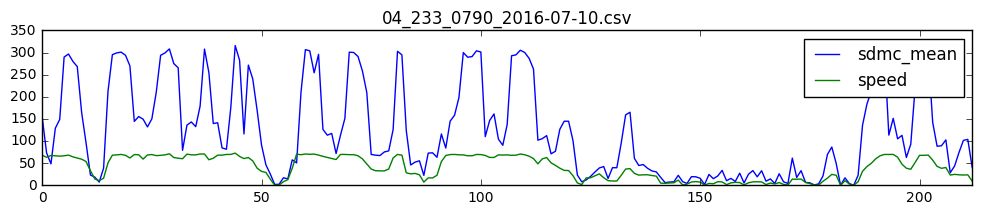

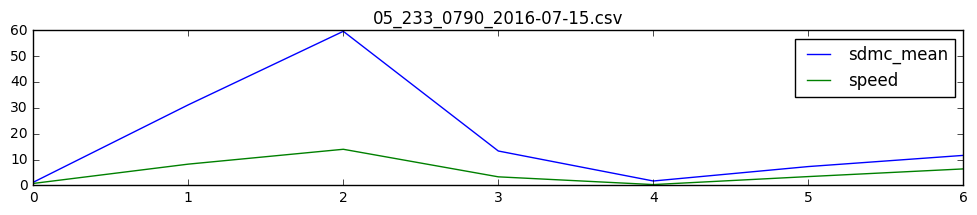

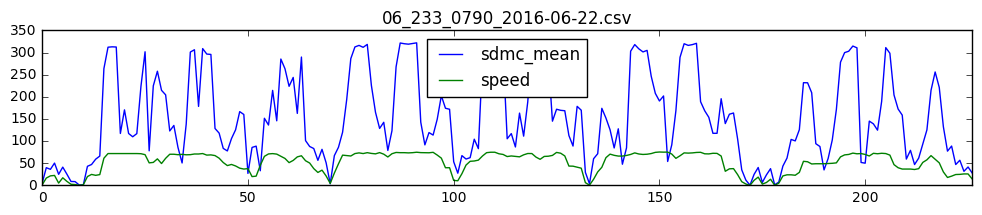

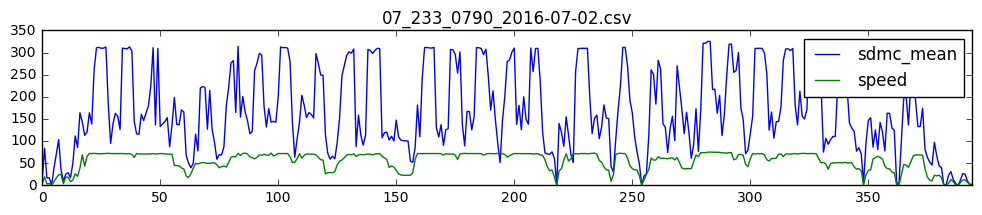

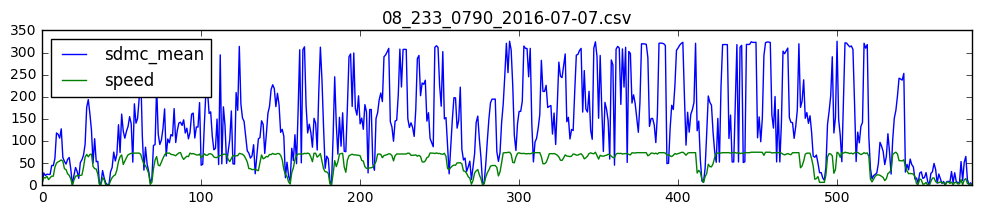

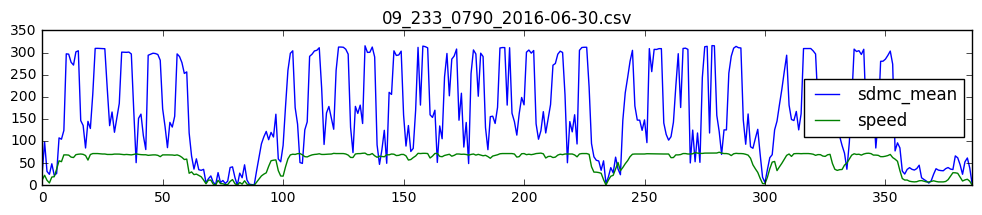

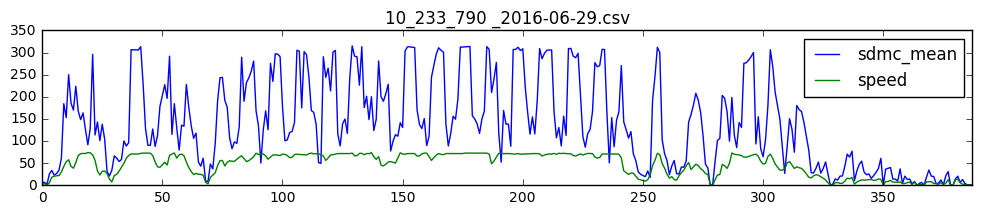

In [21]:
data_dir = root_dir + "/data_0790/speed_moving/"
sdmc_mean_speed_main(data_dir)

## ------------------

In [10]:
def temp_mean(data_dir):
    filelist = base.get_files_csv(data_dir)
    for file in filelist:
        path = data_dir + file
        df = get_temp_mean(path)
        ax = df.plot(figsize=(12,2))
        ax.set_title(file)
        ax.legend(loc='best')

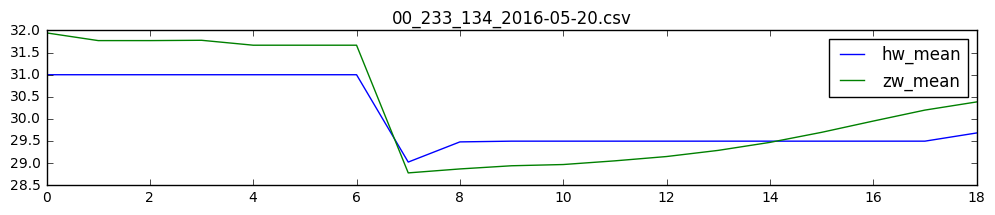

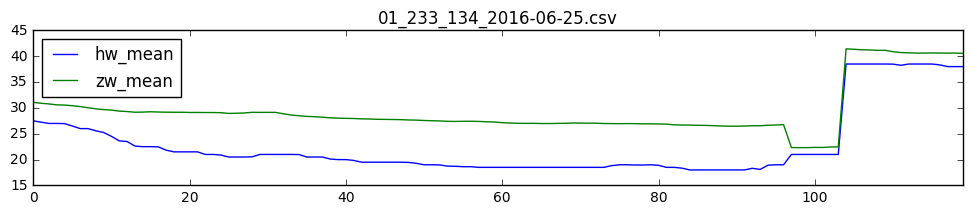

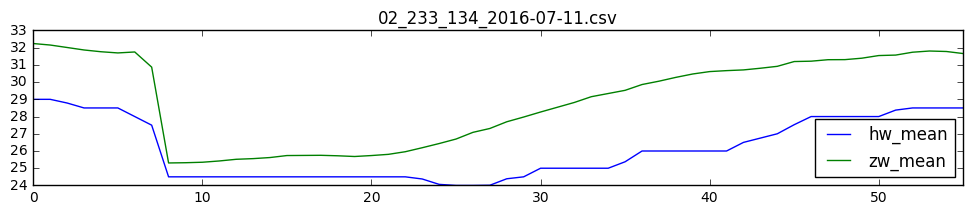

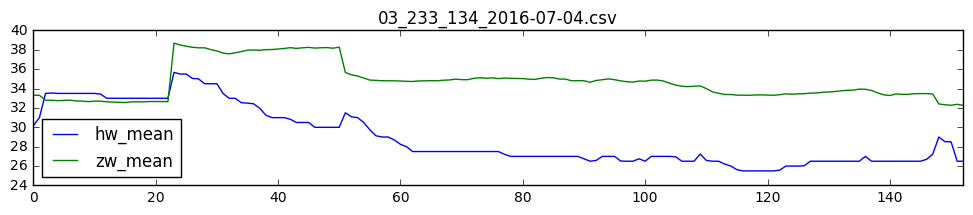

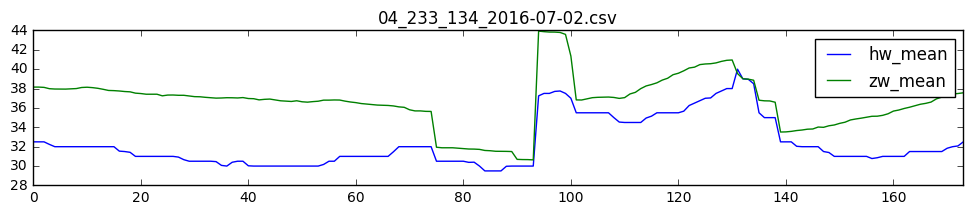

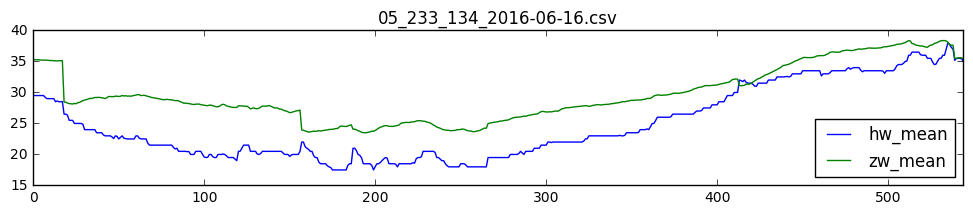

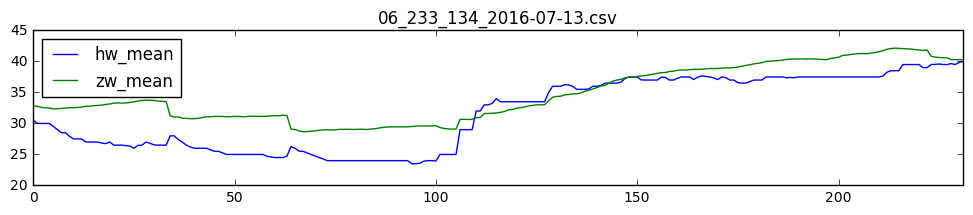

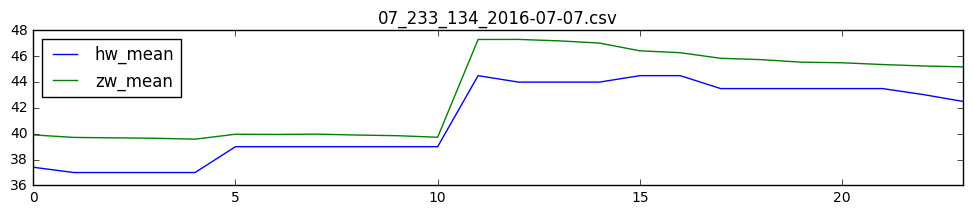

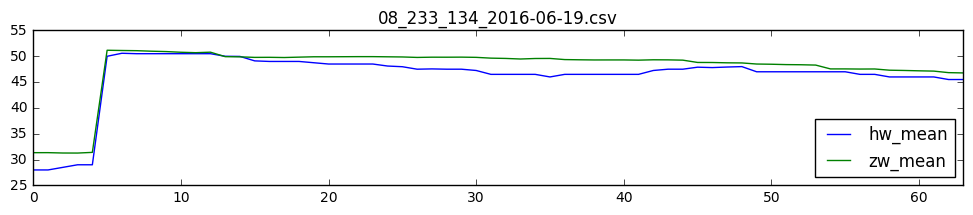

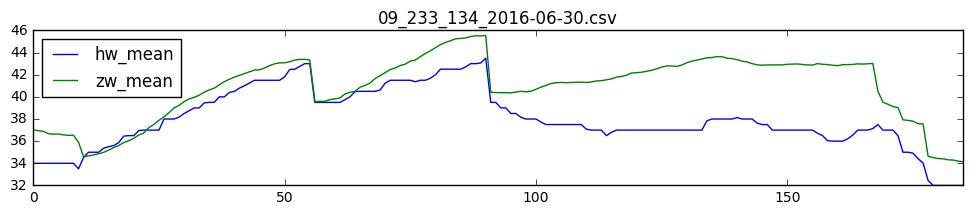

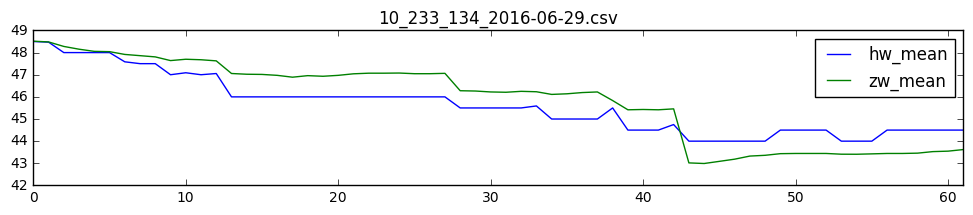

In [22]:
data_dir = root_dir + "/data_0134/speed_moving/"
temp_mean(data_dir)

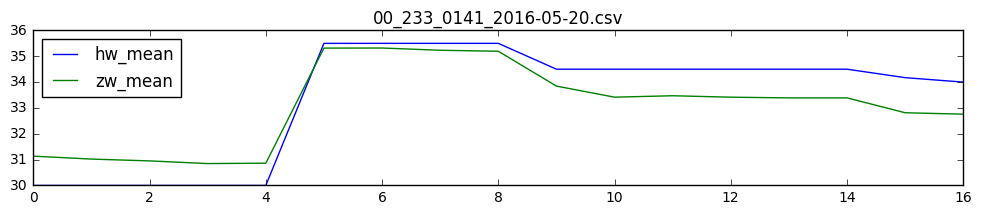

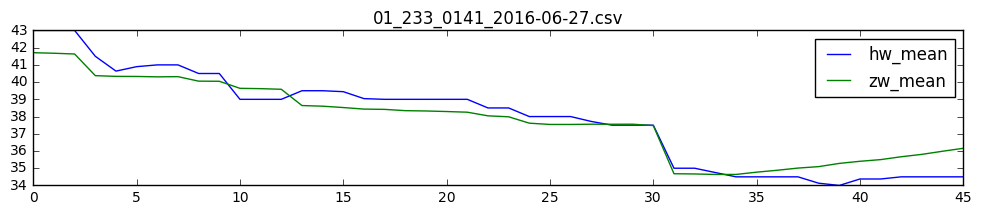

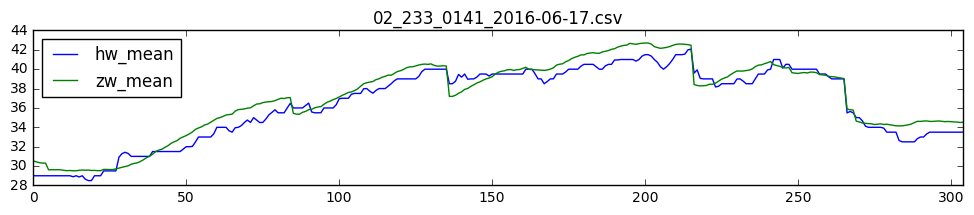

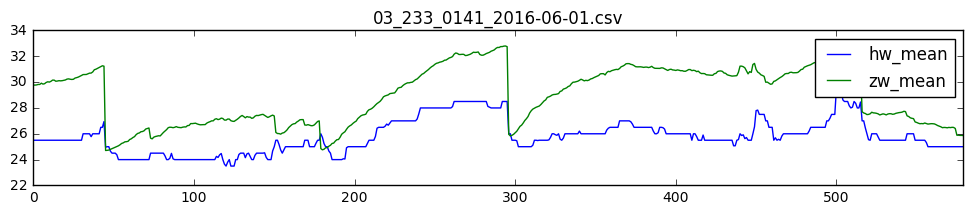

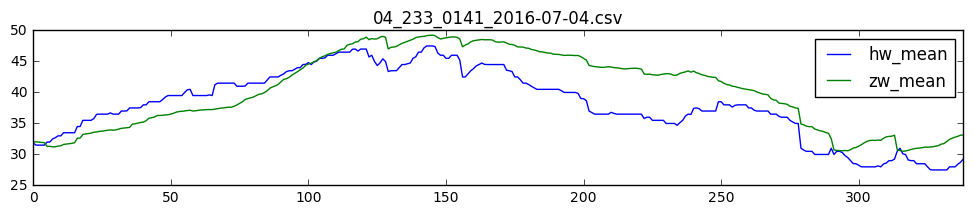

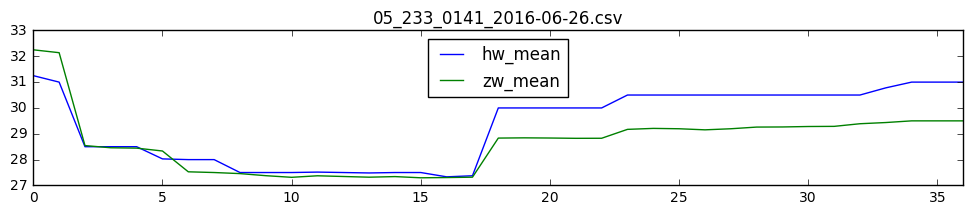

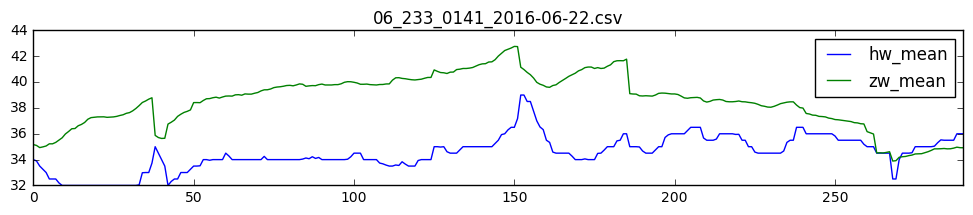

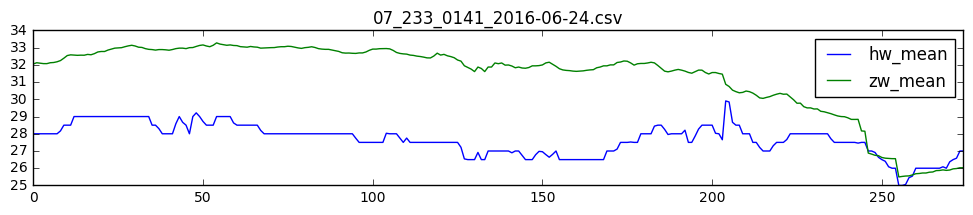

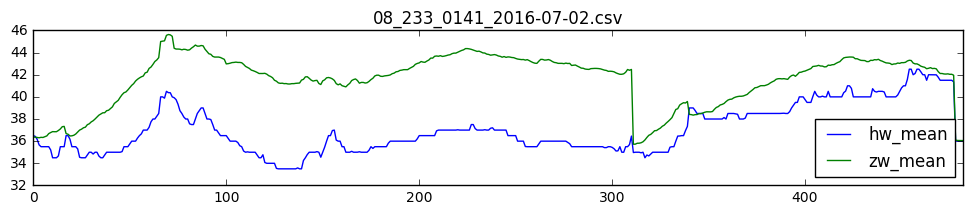

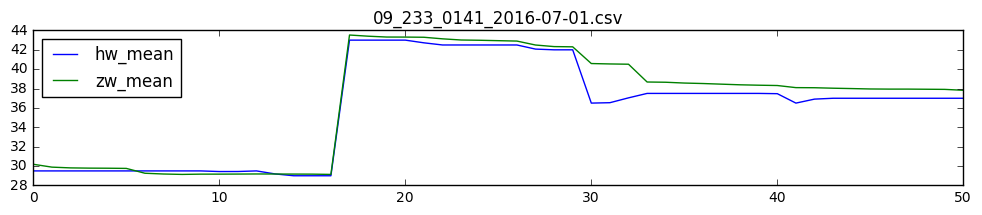

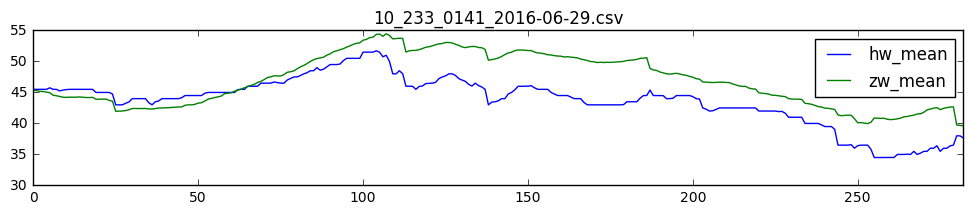

In [23]:
data_dir = root_dir + "/data_0141/speed_moving/"
temp_mean(data_dir)

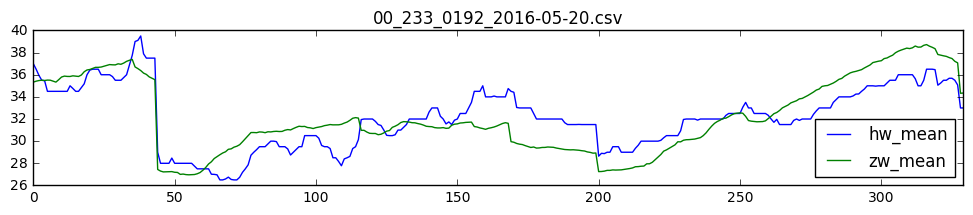

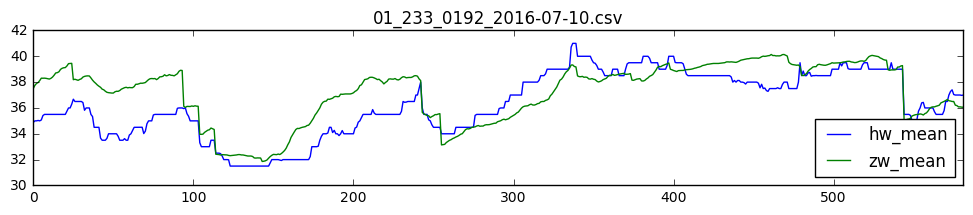

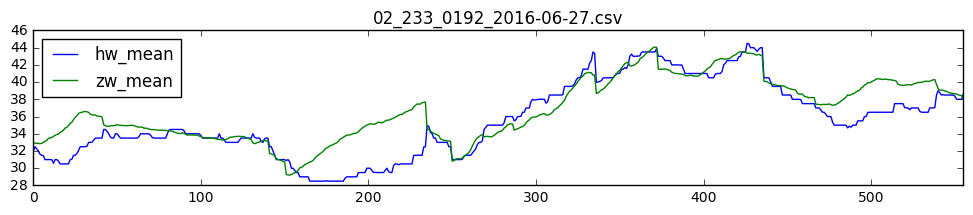

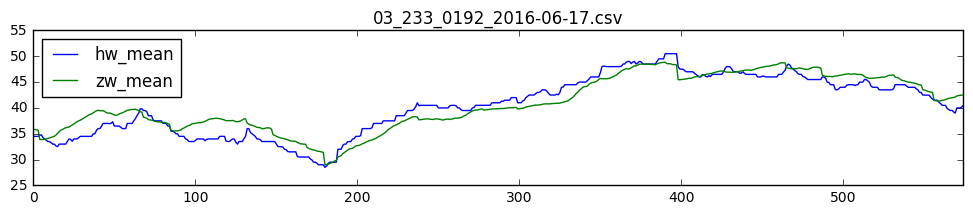

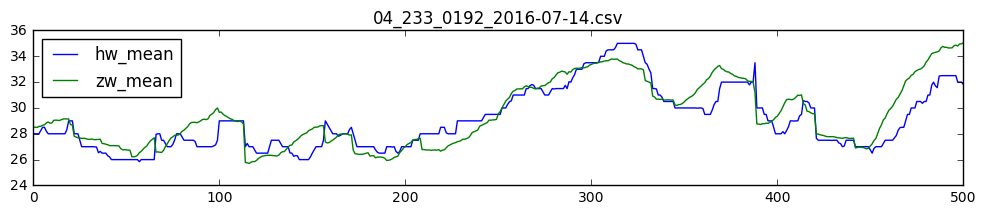

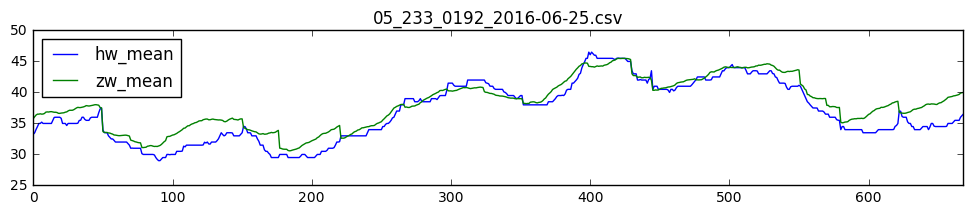

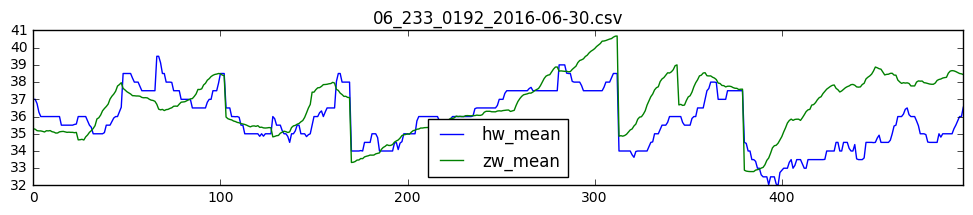

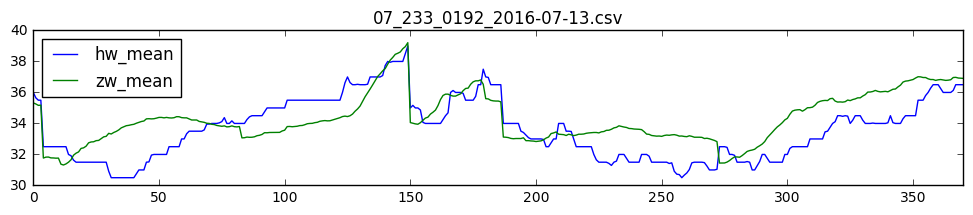

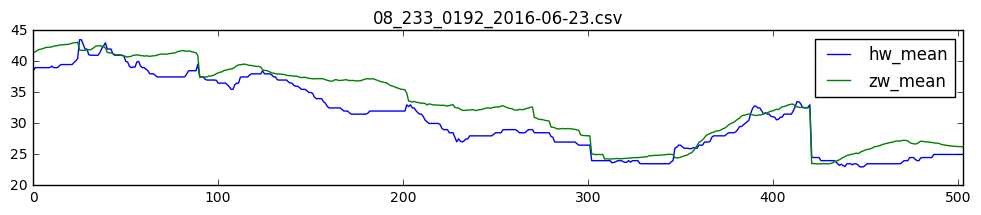

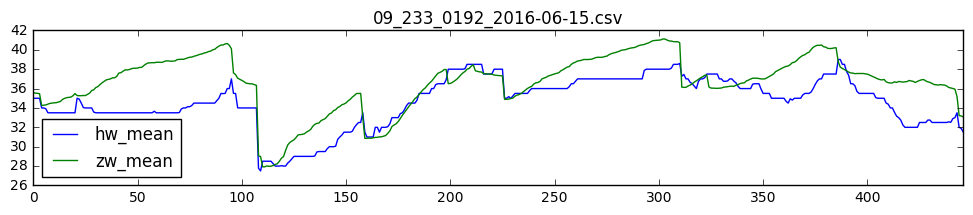

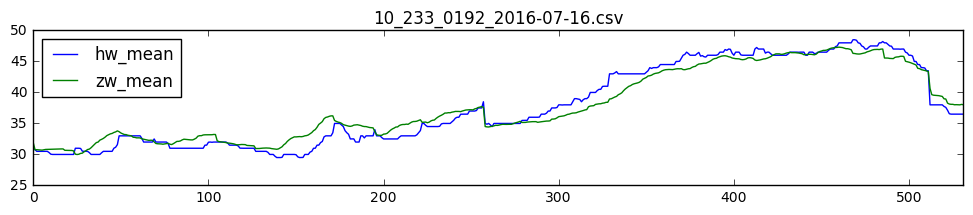

In [24]:
data_dir = root_dir + "/data_0192/speed_moving/"
temp_mean(data_dir)

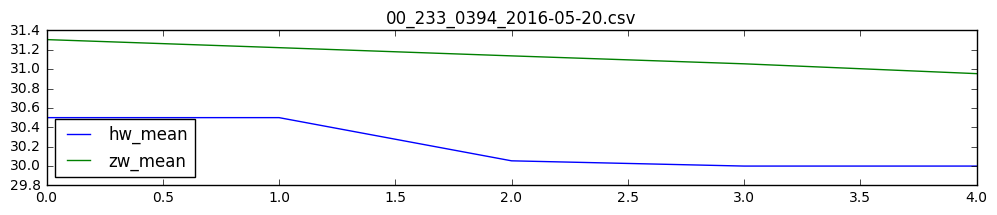

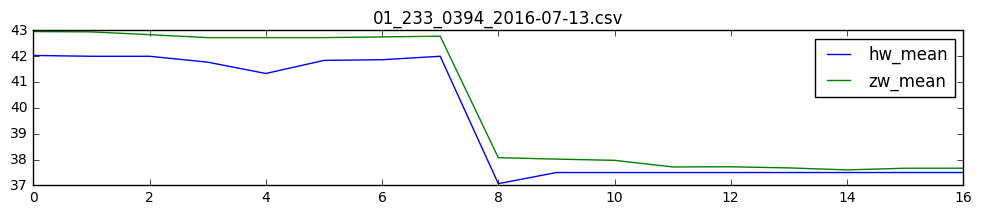

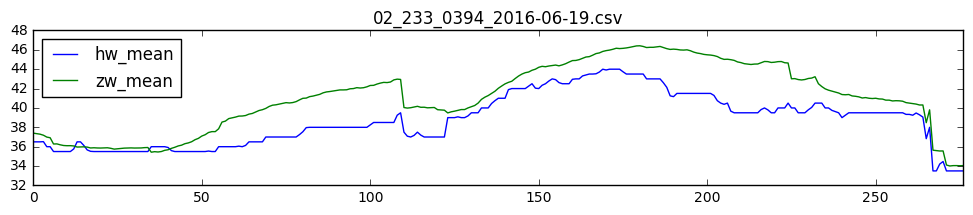

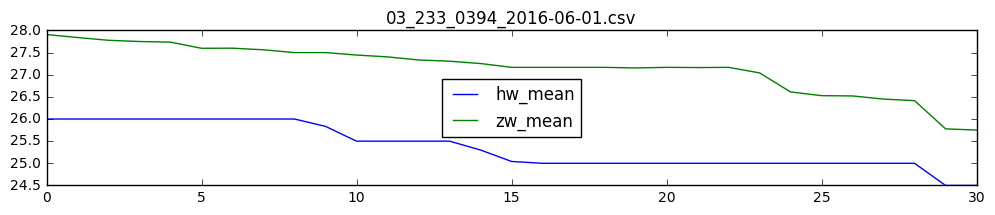

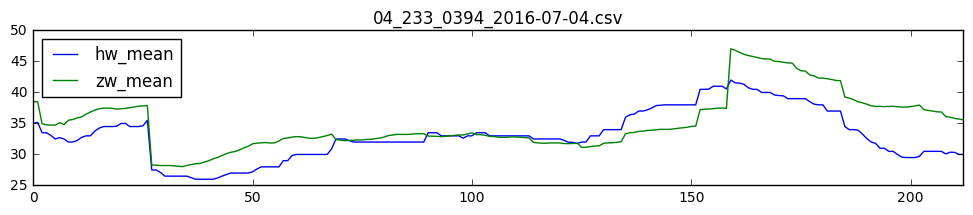

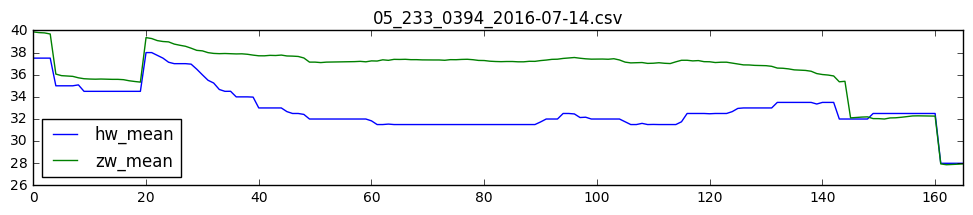

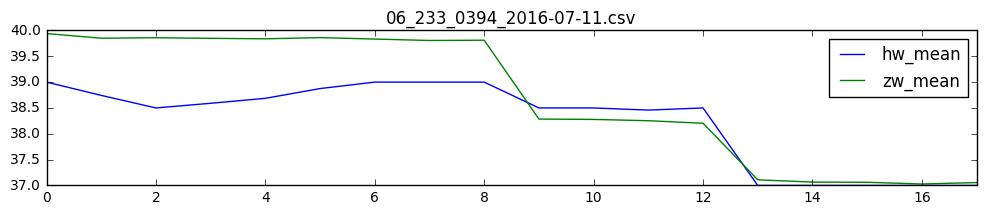

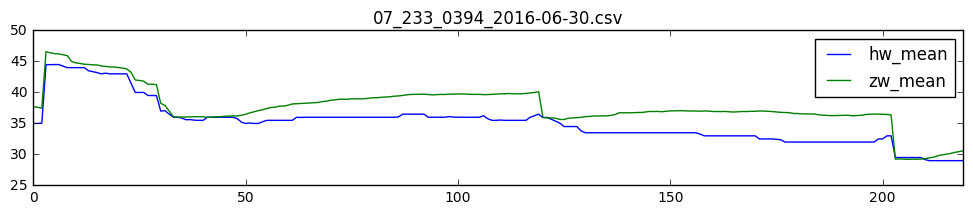

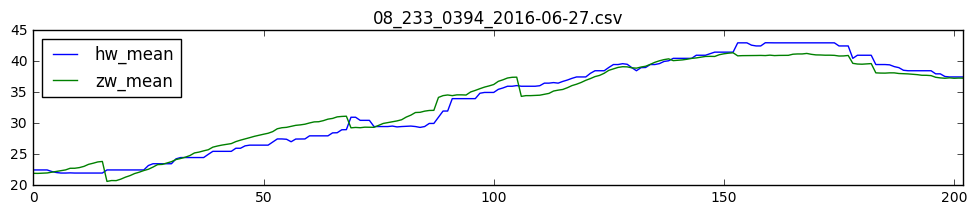

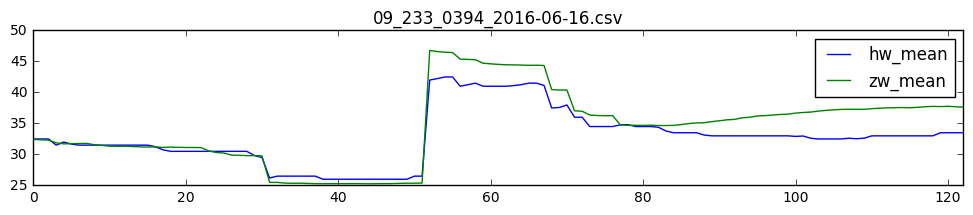

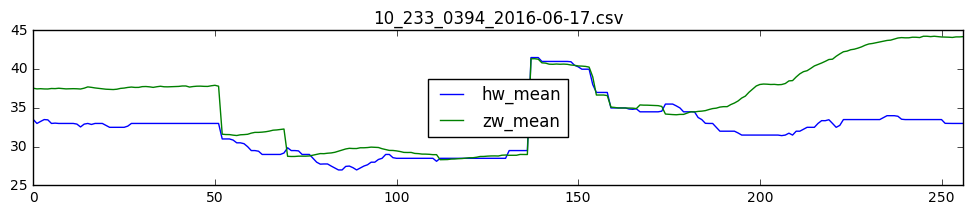

In [25]:
data_dir = root_dir + "/data_0394/speed_moving/"
temp_mean(data_dir)

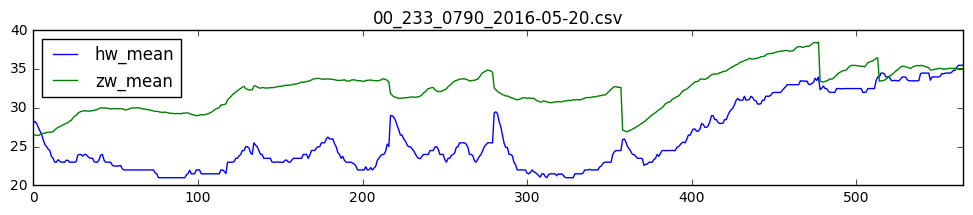

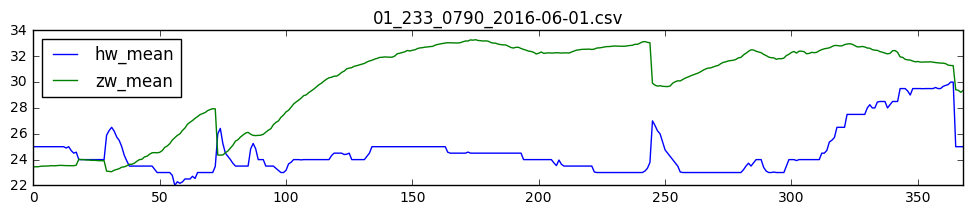

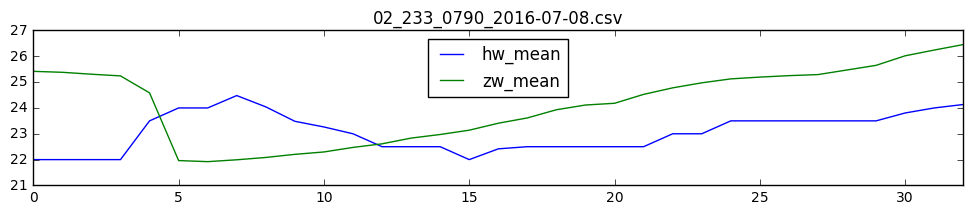

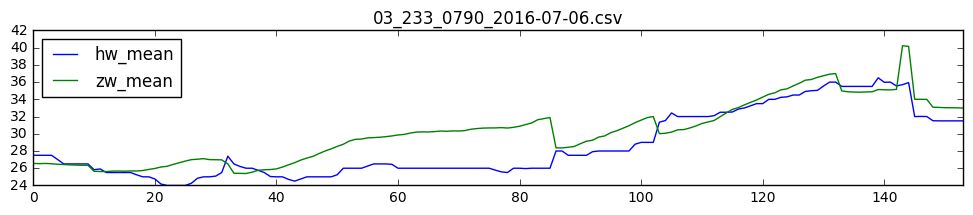

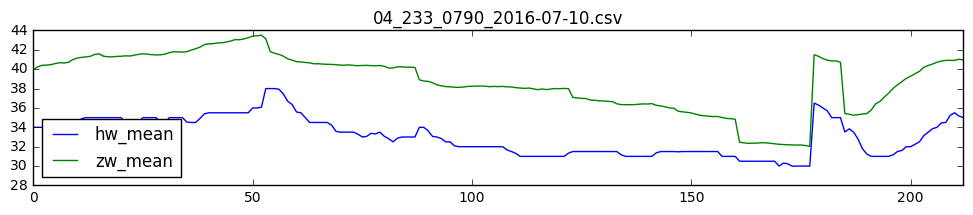

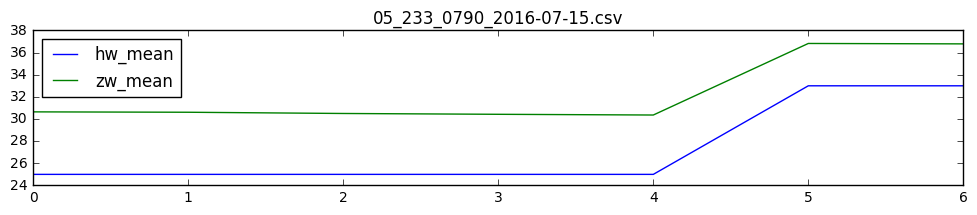

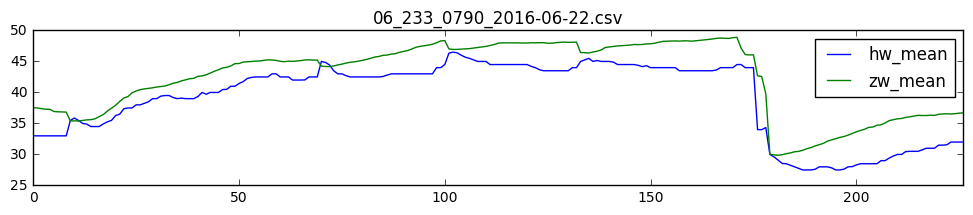

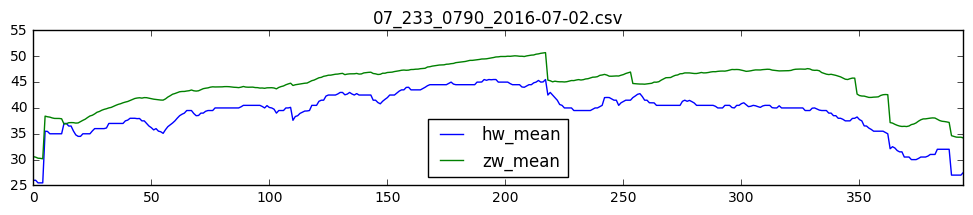

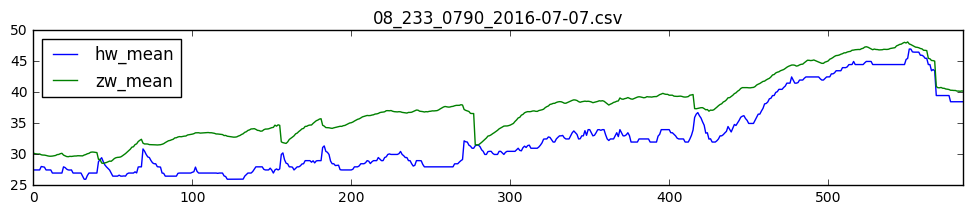

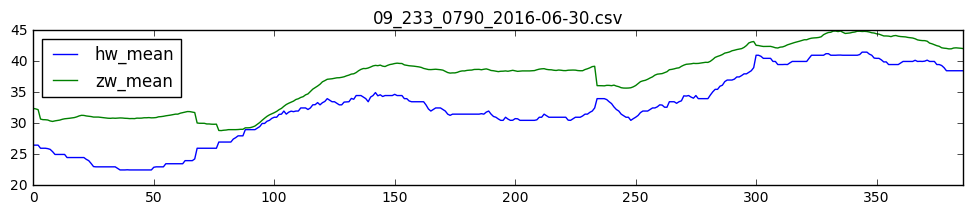

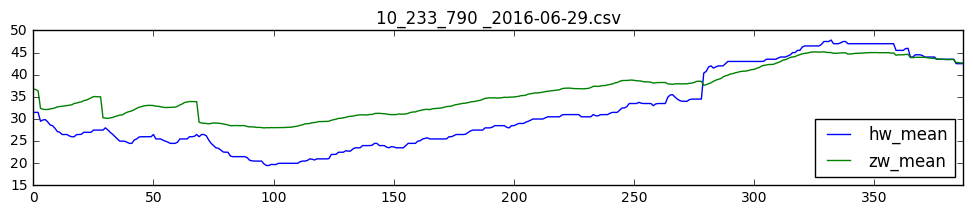

In [26]:
data_dir = root_dir + "/data_0790/speed_moving/"
temp_mean(data_dir)

### static

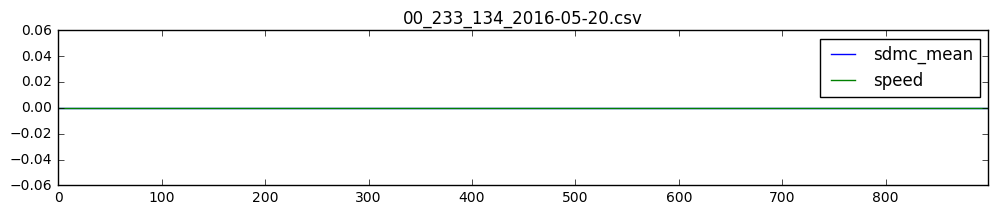

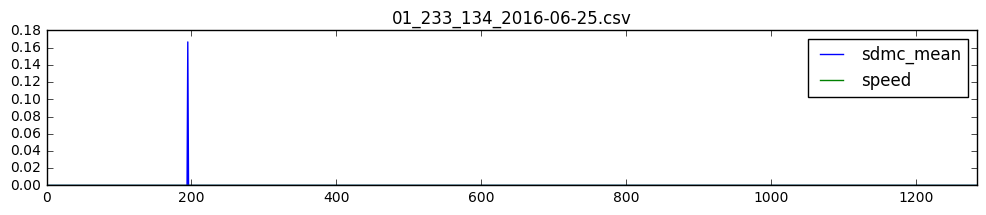

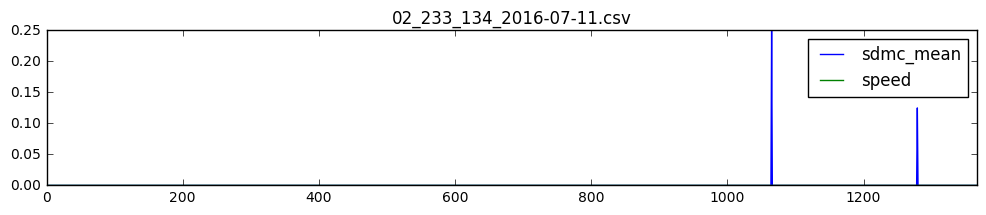

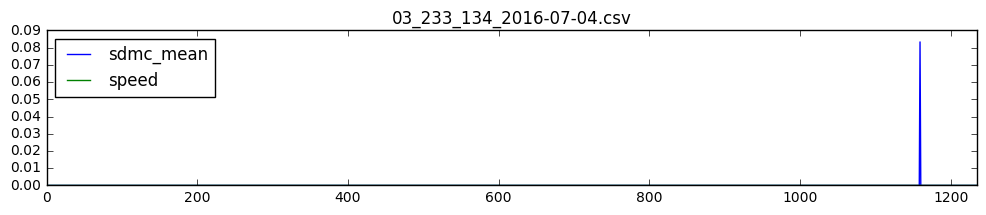

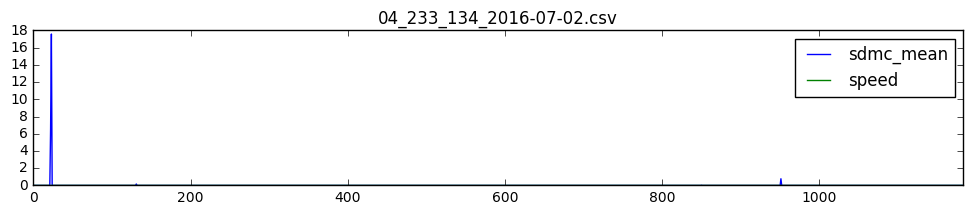

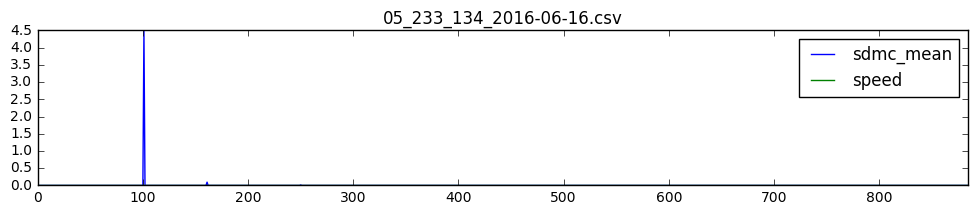

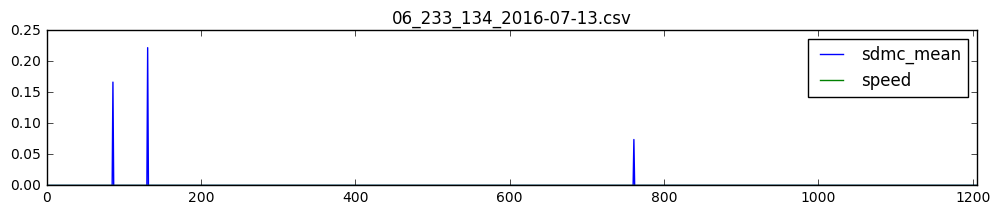

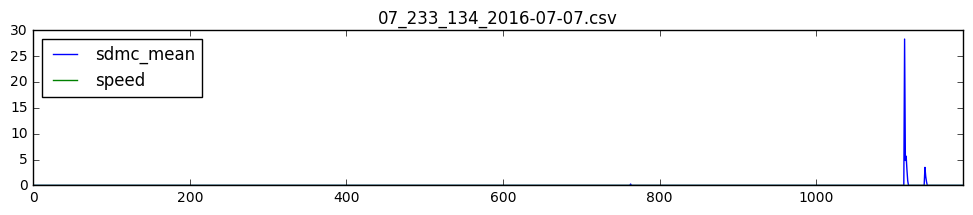

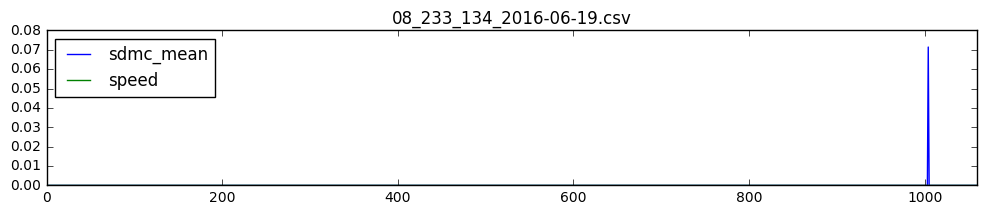

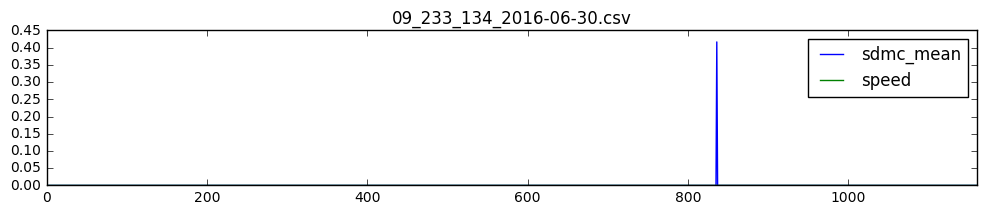

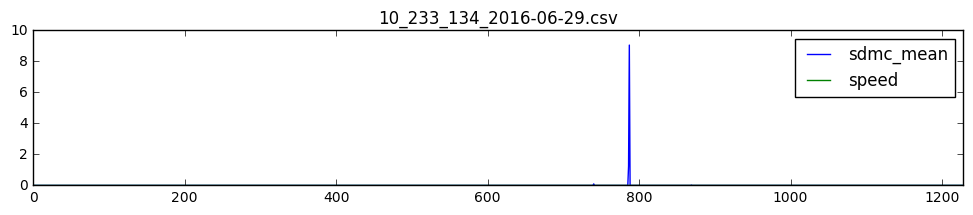

In [30]:
data_dir = root_dir + "/data_0134/speed_static/"
sdmc_mean_speed_main(data_dir)

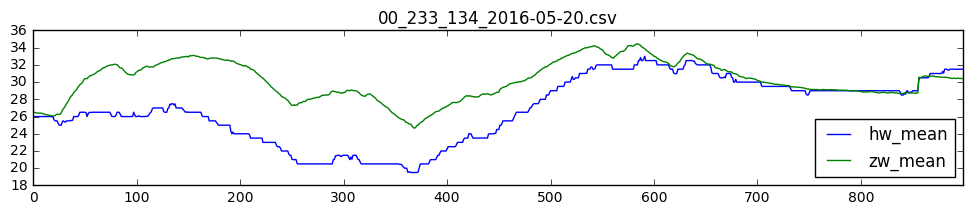

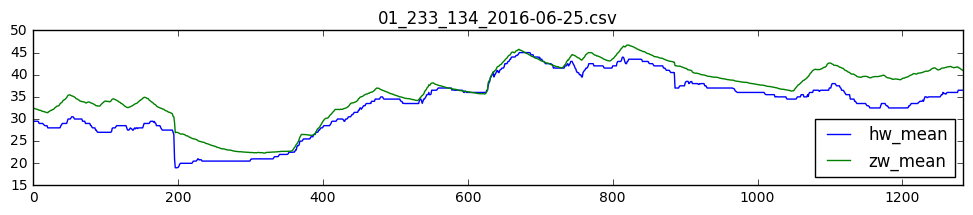

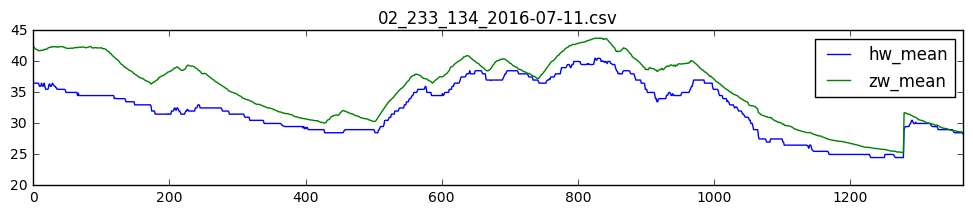

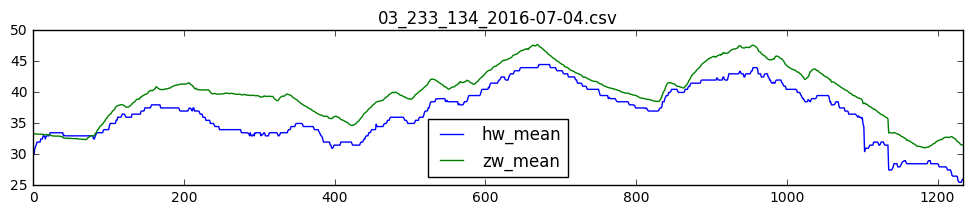

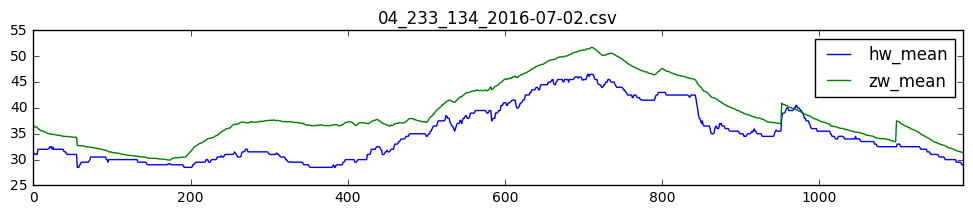

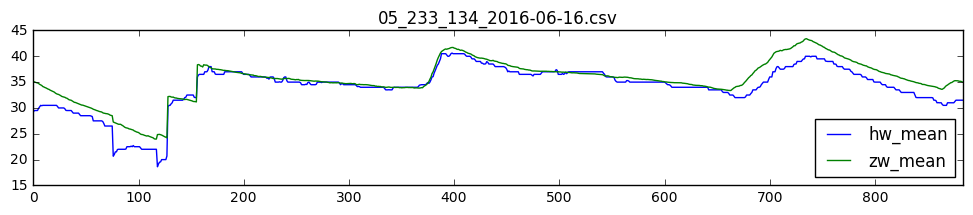

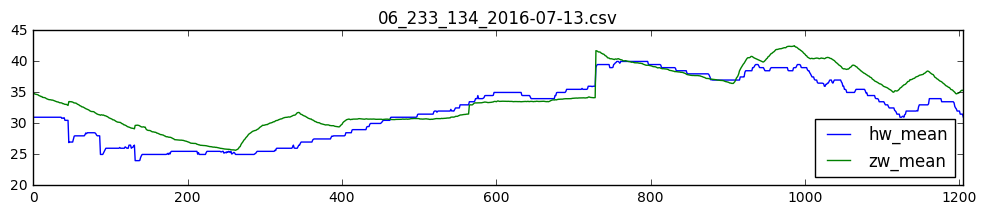

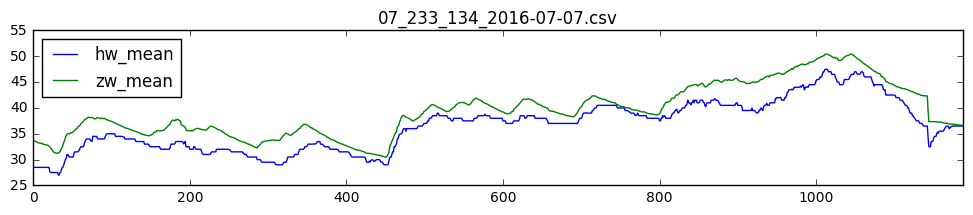

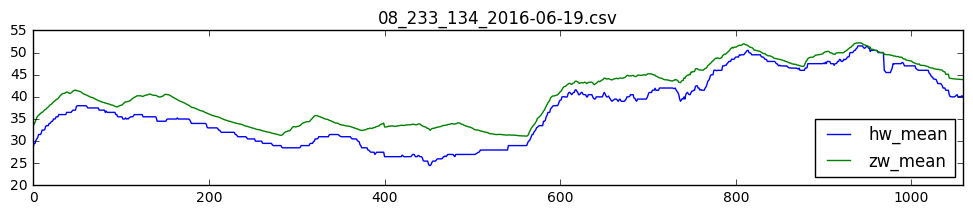

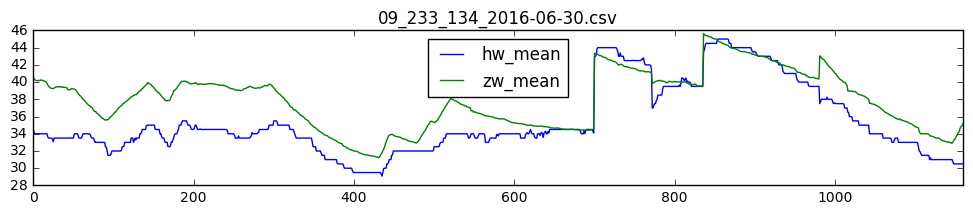

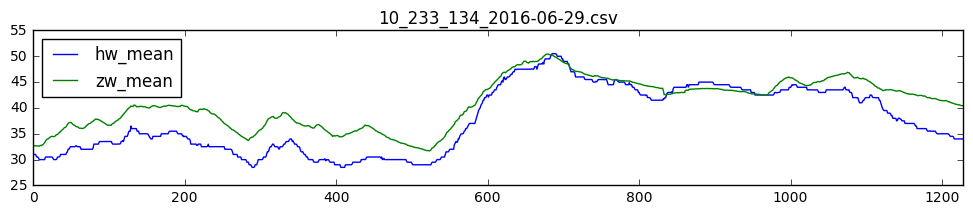

In [31]:
data_dir = root_dir + "/data_0134/speed_static/"
temp_mean(data_dir)

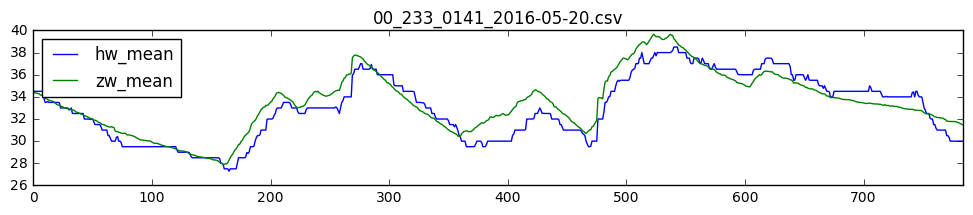

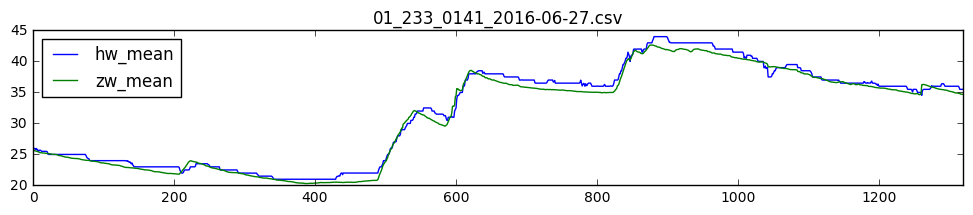

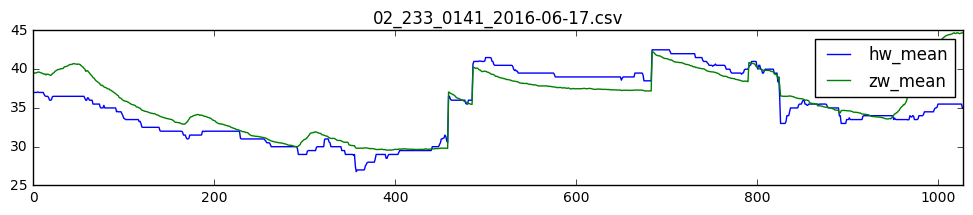

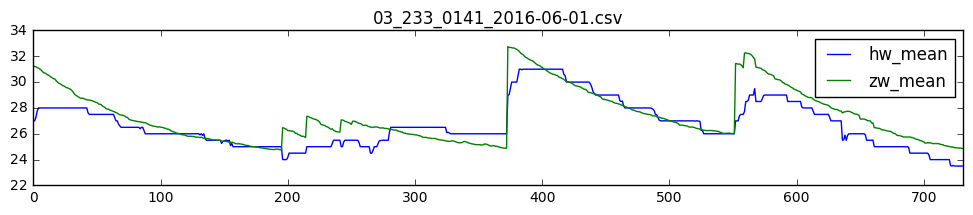

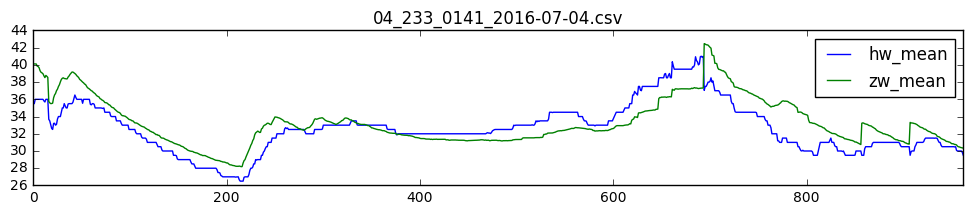

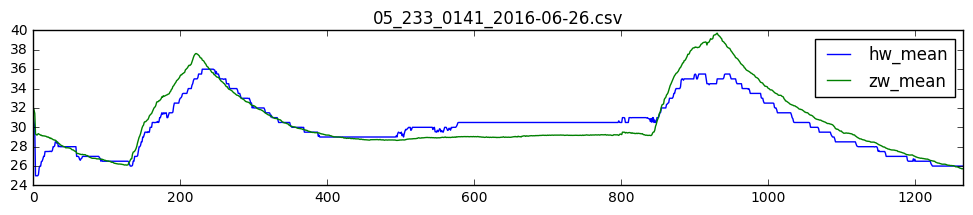

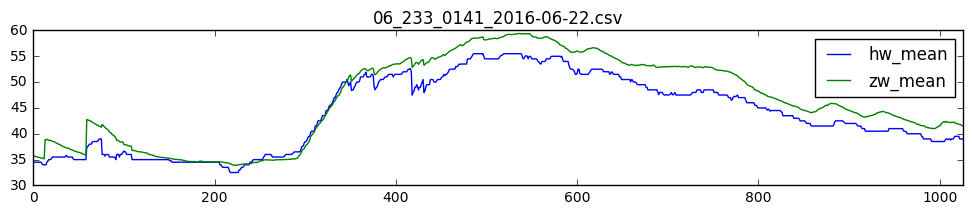

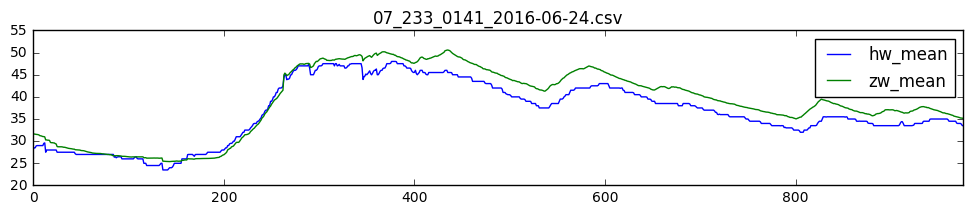

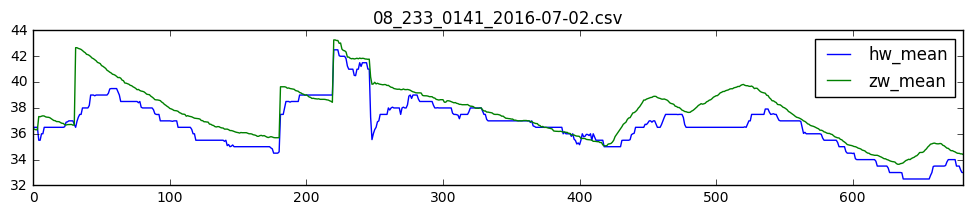

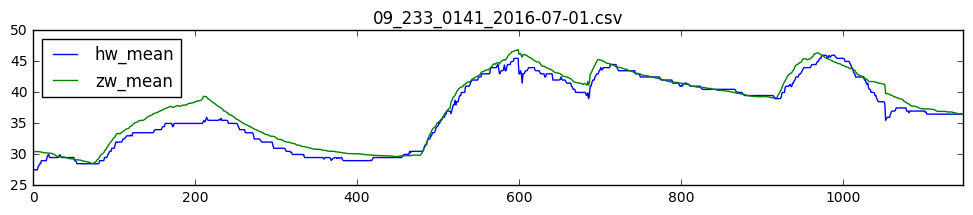

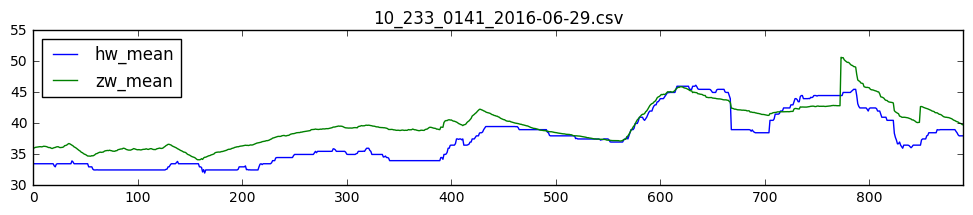

In [32]:
data_dir = root_dir + "/data_0141/speed_static/"
temp_mean(data_dir)

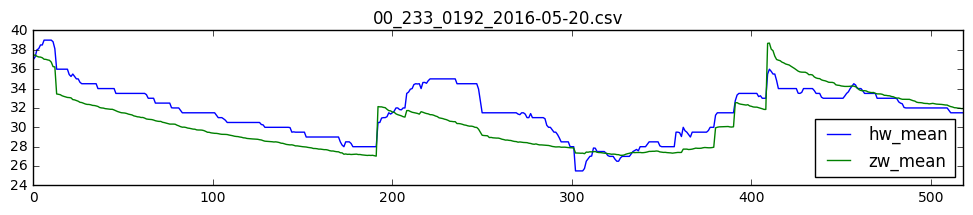

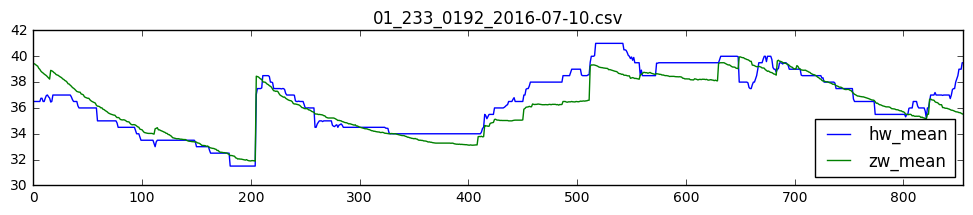

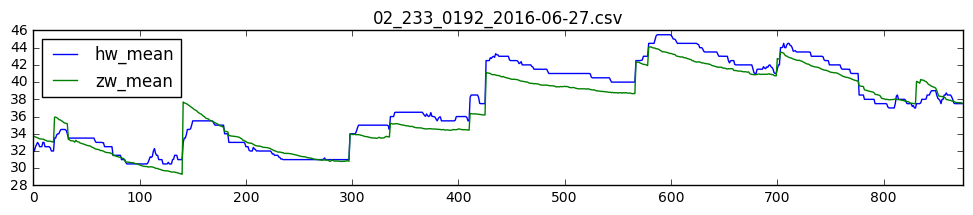

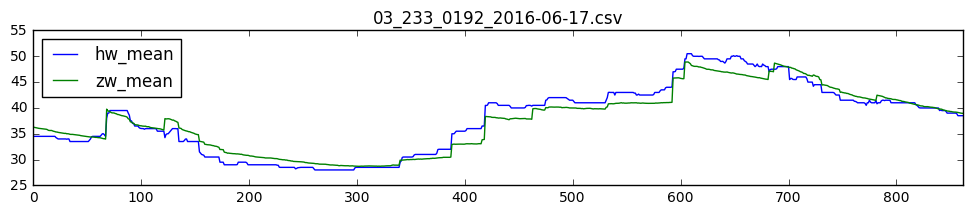

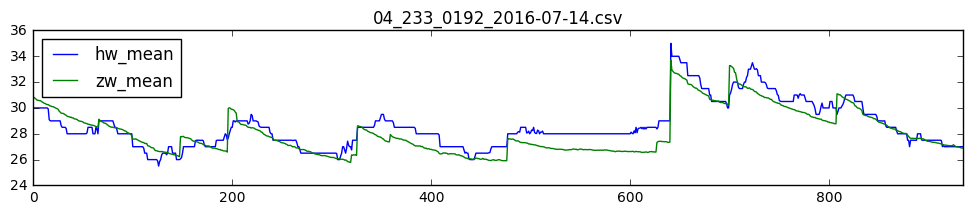

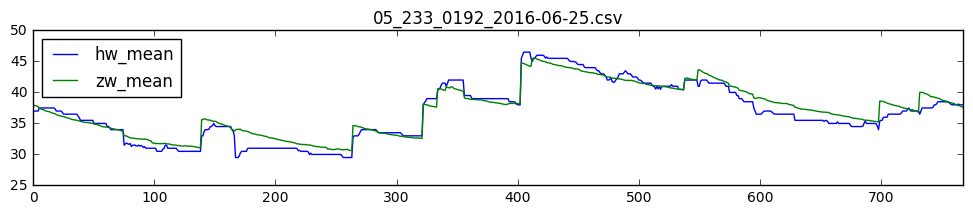

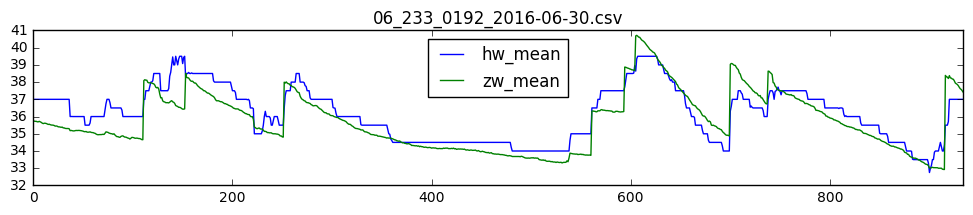

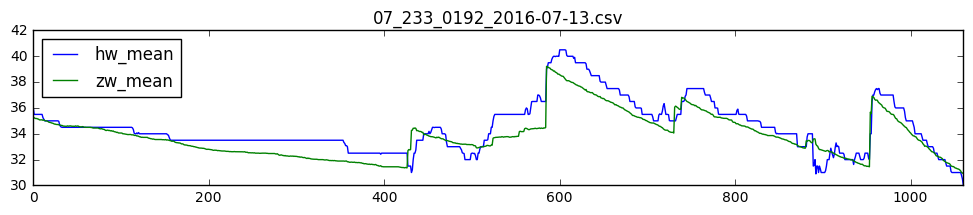

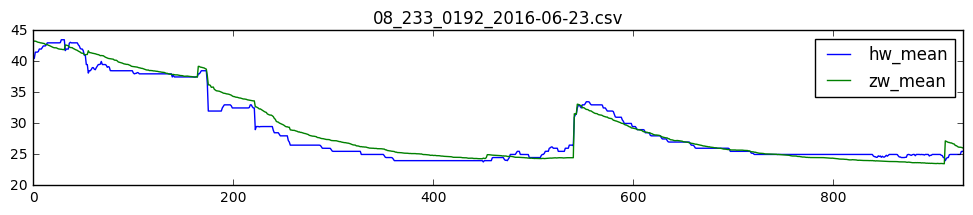

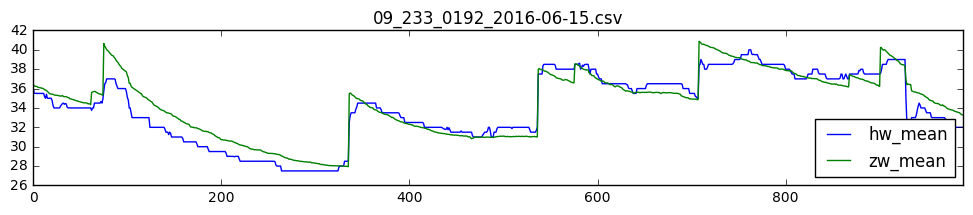

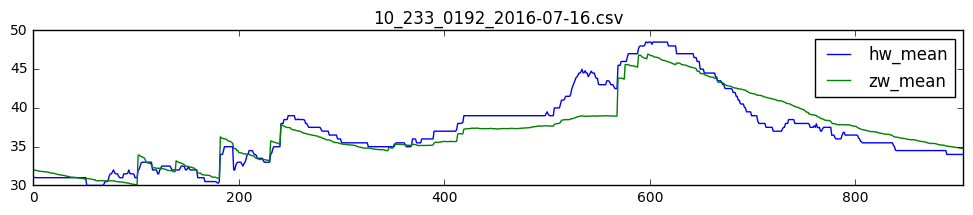

In [33]:
data_dir = root_dir + "/data_0192/speed_static/"
temp_mean(data_dir)

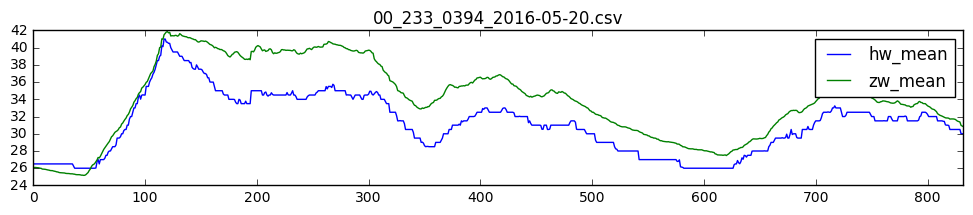

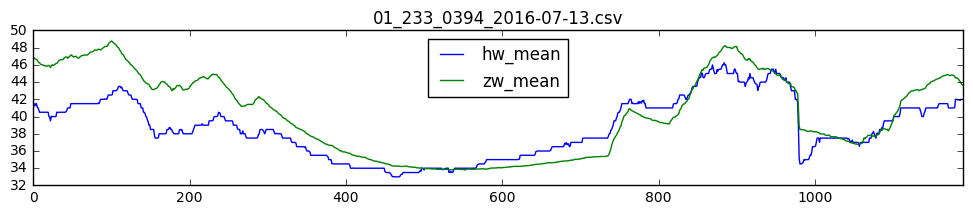

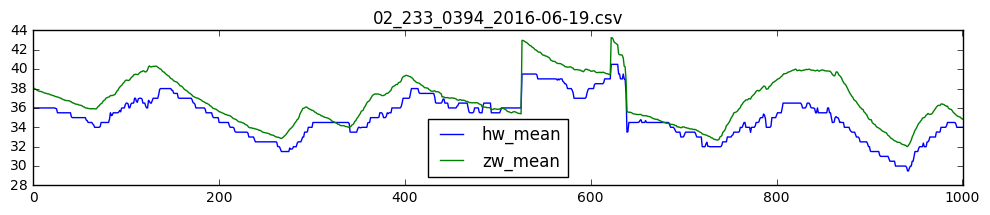

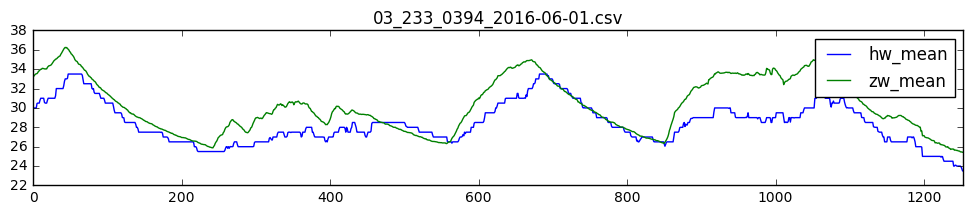

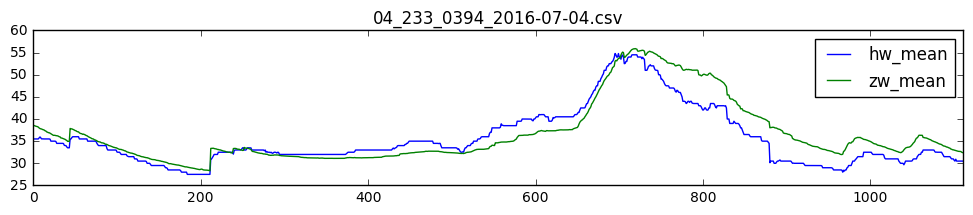

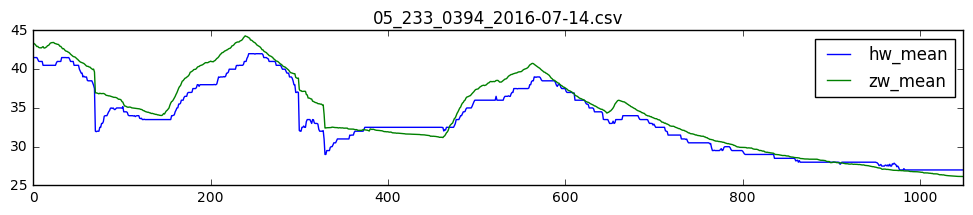

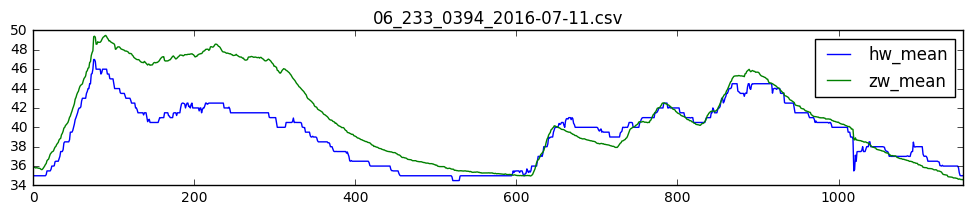

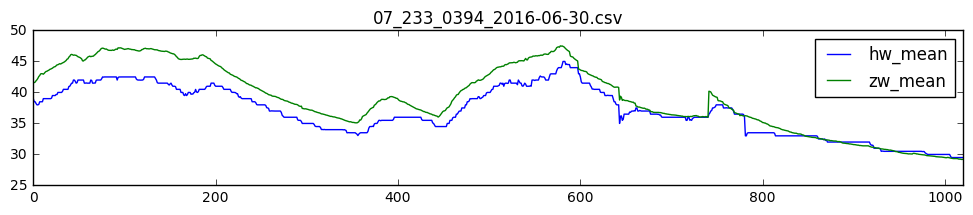

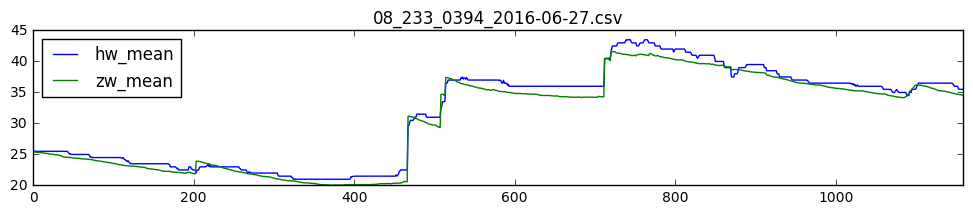

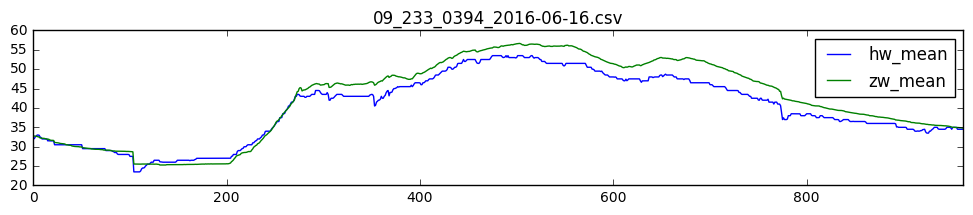

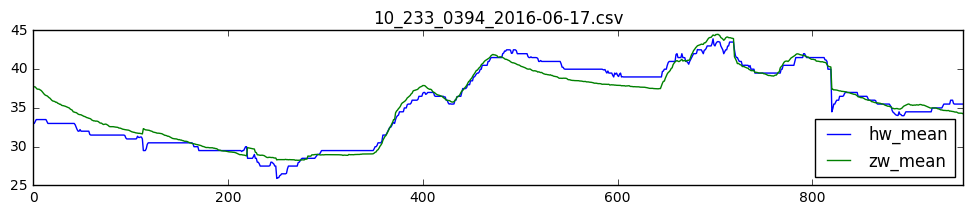

In [34]:
data_dir = root_dir + "/data_0394/speed_static/"
temp_mean(data_dir)

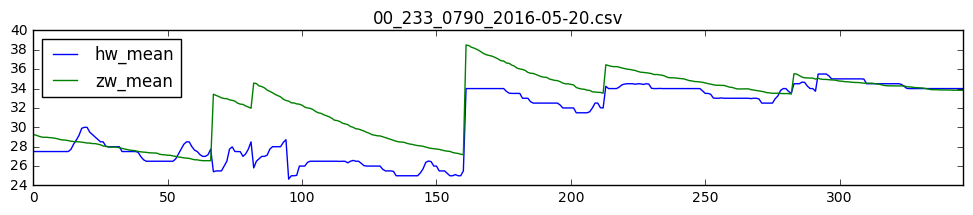

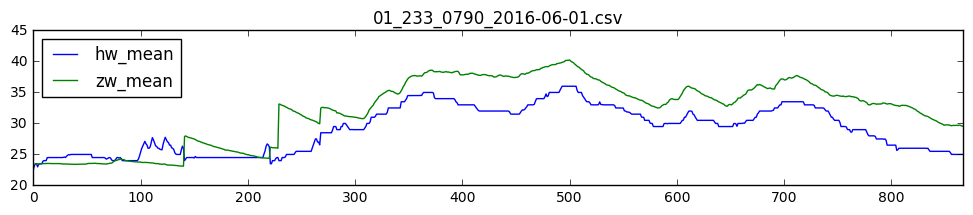

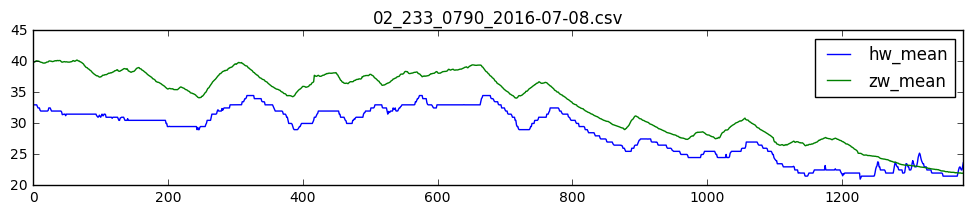

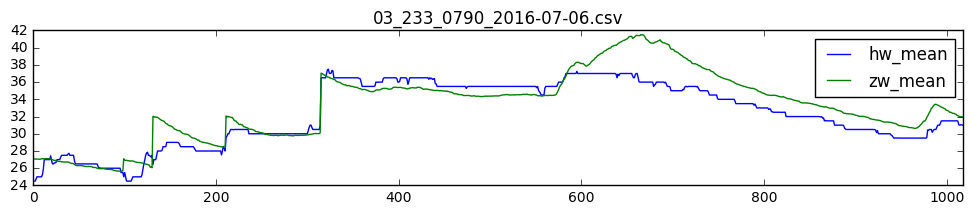

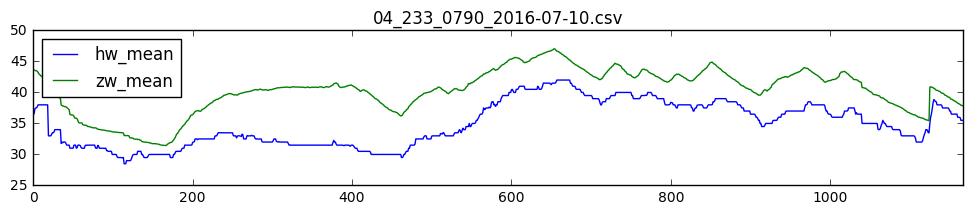

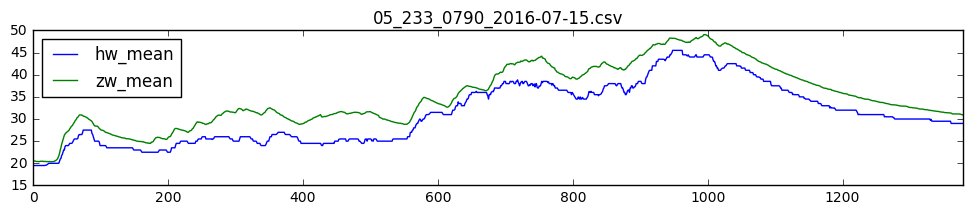

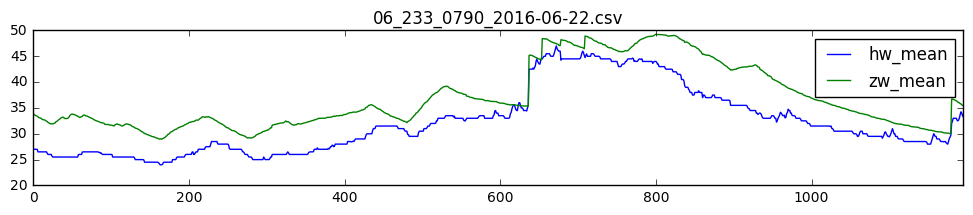

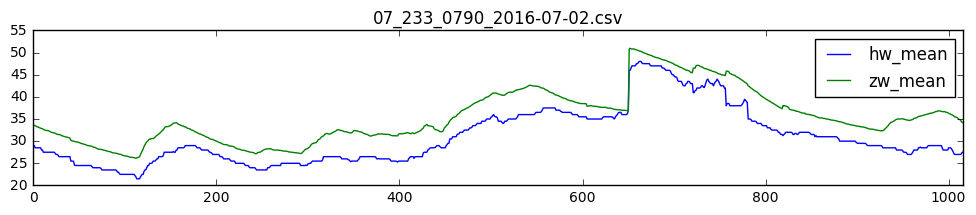

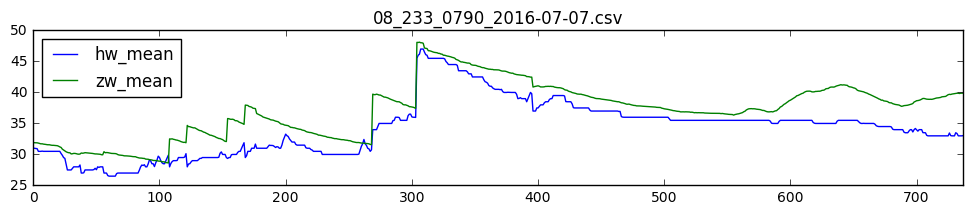

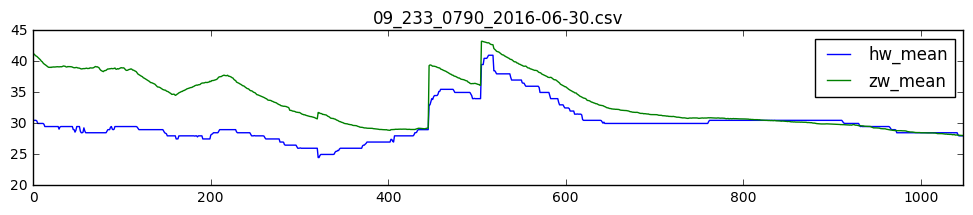

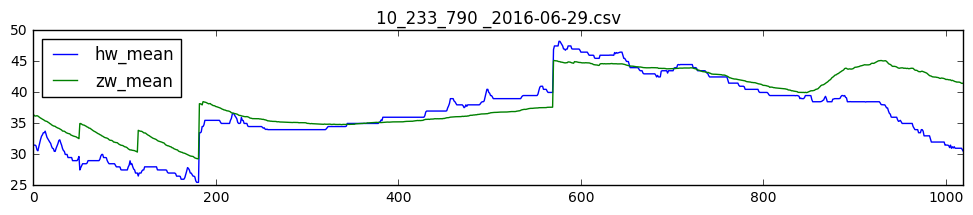

In [35]:
data_dir = root_dir + "/data_0790/speed_static/"
temp_mean(data_dir)